<h2><b>All codes for plots used in master thesis</b></h2>

-for all violin plots, all variable are interchangable. 

<h1><b>Biomarkers vs. ISUP</b></h1>

- one can replace 'Max Somatic AF' with 'TMB' or 'ctDNA unfiltered'

New names:
* `` -> ...3


 [1] "ID_CVK"                   "ID_CCM"                  
 [3] "...3"                     "Max Somatic AF"          
 [5] "ctDNA Fraction"           "ctDNA Unfiltered"        
 [7] "ctDNA Filtered"           "TMB"                     
 [9] "MSI"                      "Disease Status"          
[11] "Follow-up Disease Status" "Metastatic Stage"        
[13] "Stage"                    "LocalizedMetastatic"     
[15] "ECOG"                     "ISUP"                    
[17] "STAMPEDE"                 "LATITUDE"                
[19] "iPSA"                     "PSA at ctDNA"            
[21] "Dead "                    "1st Line Therapy"        
[23] "2nd Line of Therapy"      "3rd Line of Therapy"     
[25] "4th Line of Therapy"      "Total Lines of Therapy"  


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"

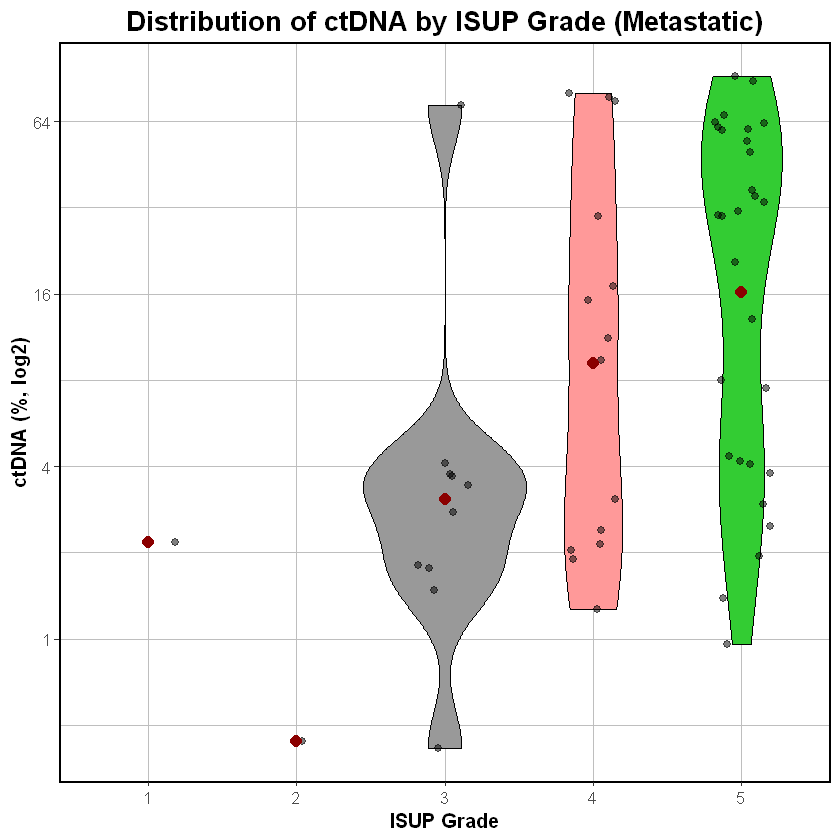

Spearman Correlation (Metastatic Patients): 0.43 
Spearman Correlation (Localized Patients): 0.43 


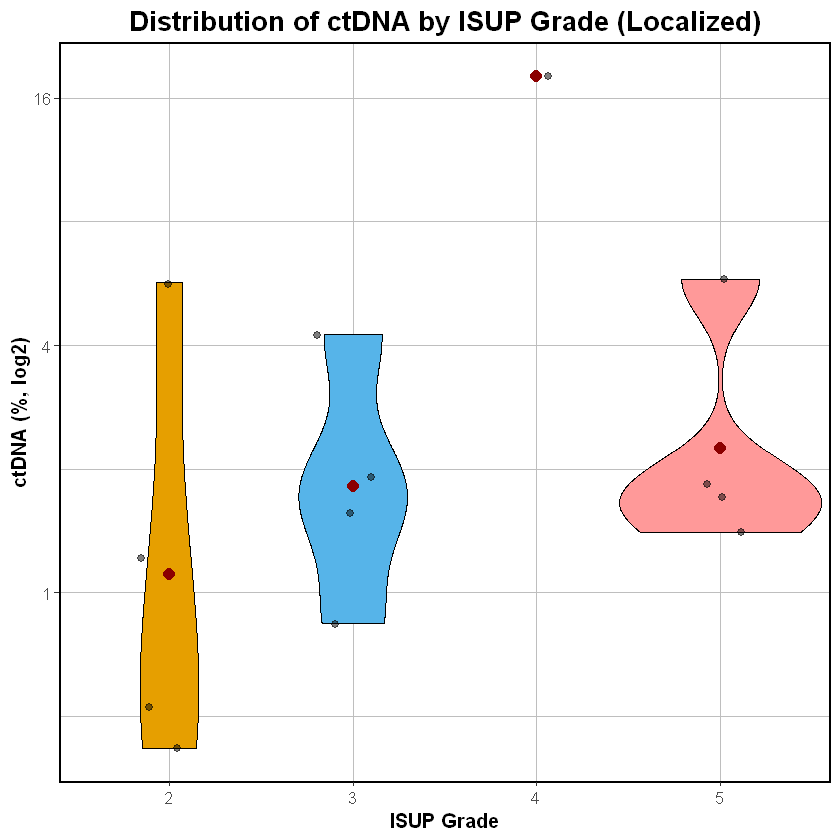

In [110]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Convert 'ISUP' to factor with appropriate levels
df$ISUP <- factor(df$ISUP, levels = sort(unique(df$ISUP)))

# Filter out NA values 
df <- df[!is.na(df$`Max Somatic AF`) & !is.na(df$ISUP), ]

my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#6A5ACD", "#20B2AA")  

# Filter data for metastatic and localized patients 
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {
  p <- ggplot(data, aes(x = ISUP, y = `Max Somatic AF`, fill = ISUP)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 1.1) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "ISUP Grade", y = "Max Somatic AF (%, log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          axis.text = element_text(size = 10)) +  
    theme(panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Create and save plots for metastatic and localized patients
if (nrow(df_metastatic) > 0) {
  create_violin_plot(df_metastatic, "Distribution of Max Somatic AF by ISUP Grade (Metastatic)", "C:/Users/hayae/Desktop/plot_metastatic.png")
}

if (nrow(df_localized) > 0) {
  create_violin_plot(df_localized, "Distribution of Max Somatic AF by ISUP Grade (Localized)", "C:/Users/hayae/Desktop/plot_localized.png")
}

# Calculate and print Spearman correlation for metastatic patients
if (nrow(df_metastatic) > 0) {
  spearman_corr_metastatic <- cor(rank(df_metastatic$`Max Somatic AF`), rank(df_metastatic$ISUP), method = "spearman")
  cat("Spearman Correlation (Metastatic Patients):", round(spearman_corr_metastatic, 2), "\n")
}

# Calculate and print Spearman correlation for localized patients
if (nrow(df_localized) > 0) {
  spearman_corr_localized <- cor(rank(df_localized$`Max Somatic AF`), rank(df_localized$ISUP), method = "spearman")
  cat("Spearman Correlation (Localized Patients):", round(spearman_corr_localized, 2), "\n")
}


<h1><b>Biomarkers vs. by Follow-up Disease Status</b></h1>

New names:
* `` -> ...3
Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


Spearman Correlation: 0.25 


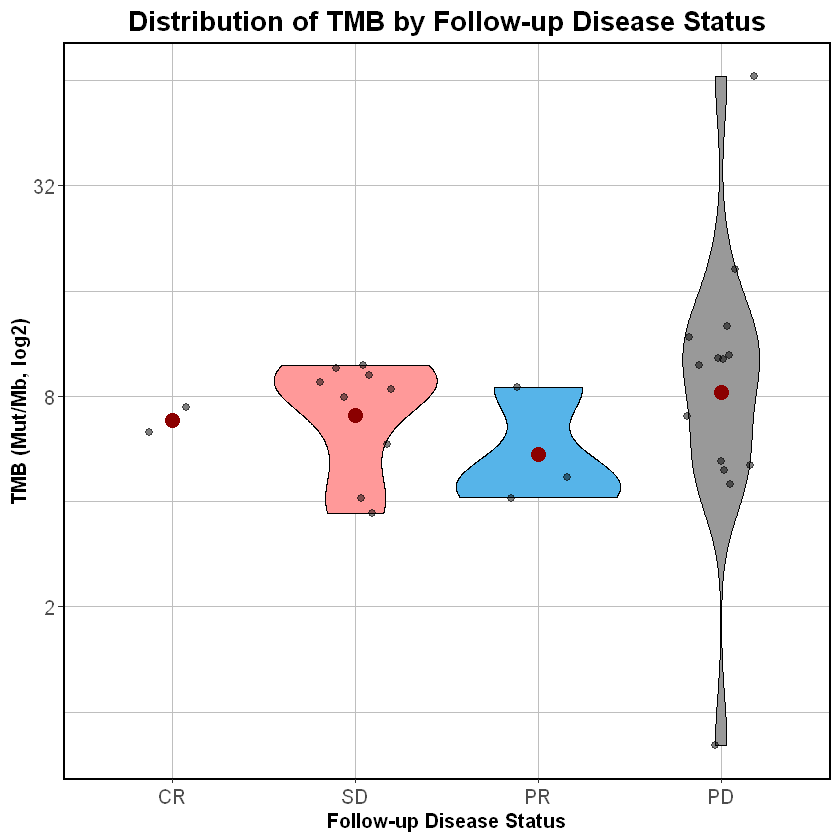

In [178]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Convert 'Follow-up Disease Status' to a factor with appropriate levels
df$`Follow-up Disease Status` <- factor(df$`Follow-up Disease Status`, levels = c("CR", 'SD', 'PR', 'PD/ PR', "PD"))

# Filter out NA values 
df <- df[!is.na(df$`Max Somatic AF`) & !is.na(df$`Follow-up Disease Status`), ]

# Filter out rows with 'Follow-up Disease Status' not in the specified levels
df <- df[df$`Follow-up Disease Status` %in% levels(df$`Follow-up Disease Status`), ]


my_colors <- c("#E69F00", "#999999", "#56B4E9", "#FF9999", "#33cc33", "#8B4513")  


if (nrow(df) > 0) {
  # Create violin plot with log scale and custom colors
  p <- ggplot(df, aes(x = `Follow-up Disease Status`, y = `Max Somatic AF`, fill = `Follow-up Disease Status`)) +
    geom_violin(color = "black", draw_quantiles = NULL) +  # Draw violin plot
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 4, color = "darkred", shape = 16) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "Follow-up Disease Status", y = "Max Somatic AF (Mut/Mb, log2)") +
    ggtitle("Distribution of Max Somatic AF by Follow-up Disease Status") +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          axis.text = element_text(size = 12)) +  
    theme(panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave("C:/Users/hayae/Desktop/Max_Somatic_AF_Followup_Disease_Status.png", plot = p, width = 8, height = 6, units = "in", dpi = 300)
  
  # Calculate and print Spearman correlation in the terminal
  spearman_corr <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$`Follow-up Disease Status`)), method = "spearman")
  cat("Spearman Correlation:", round(spearman_corr, 2), "\n")
}


<h1><b>Biomarkers vs. LATITUDE</b></h1>

New names:
* `` -> ...3


Spearman Correlation: 0.24 


Warning message in is.data.frame(y):
"NAs introduced by coercion"

Pearson Correlation: NA 


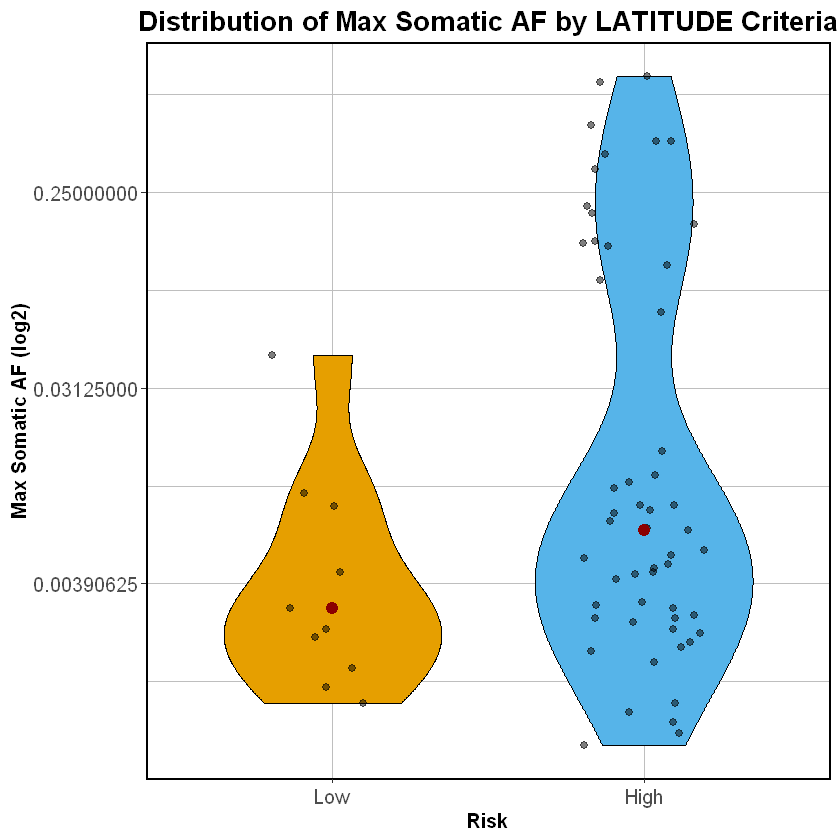

In [186]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Remove rows with NA values in 'Max Somatic AF' and 'LATITUDE'
df <- df[complete.cases(df$`Max Somatic AF`, df$LATITUDE), ]

# Remove rows with empty entries in 'LATITUDE'
df <- df[df$LATITUDE != "", ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Ensure 'LATITUDE' is a factor with appropriate levels (unique categorical values)
df$LATITUDE <- factor(df$LATITUDE, levels = unique(df$LATITUDE))  # Ensure correct factor levels


my_colors <- c("#E69F00", "#56B4E9")  

# Calculate medians for each LATITUDE group
medians <- aggregate(df$`Max Somatic AF`, by = list(df$LATITUDE), FUN = median)
colnames(medians) <- c("LATITUDE", "Median_AF")

# Convert LATITUDE to numeric for regression line
medians$LATITUDE_numeric <- as.numeric(medians$LATITUDE)


if (nrow(df) > 0) {
  # Create violin plot with log scale and custom colors
  p <- ggplot(df, aes(x = LATITUDE, y = `Max Somatic AF`, fill = LATITUDE)) +
    geom_violin(color = "black", scale = "width", width = 0.7, draw_quantiles = NULL) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    geom_point(data = medians, aes(x = LATITUDE, y = Median_AF), color = "darkred", size = 3) +  
    geom_smooth(data = medians, aes(x = LATITUDE_numeric, y = Median_AF), method = "lm", se = FALSE, color = "red") +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "LATITUDE", y = "Max Somatic AF (log2)") +
    ggtitle("Distribution of Max Somatic AF by LATITUDE") +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
      axis.title.x = element_text(size = 12, face = "bold"),  
      axis.title.y = element_text(size = 12, face = "bold"),  
      axis.text = element_text(size = 12),  
      panel.background = element_rect(fill = "white", color = "black"),  
      panel.grid.major = element_line(color = "gray", size = 0.5),  
      panel.grid.minor = element_line(color = "gray", size = 0.25),  
      panel.border = element_rect(color = "black", fill = NA, size = 1)  
    ) +
    theme(legend.position = "none") 
  

  print(p)
  
  # Calculate and print Spearman correlation in the terminal
  spearman_corr <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$LATITUDE)), method = "spearman")
  cat("Spearman Correlation:", round(spearman_corr, 2), "\n")
  
  # Calculate and print Pearson correlation in the terminal
  pearson_corr <- cor(df$`Max Somatic AF`, as.numeric(as.character(df$LATITUDE)), method = "pearson")
  cat("Pearson Correlation:", round(pearson_corr, 2), "\n")
  
 
  ggsave("C:/Users/hayae/Desktop/plot_max_somatic1.png", plot = p, width = 8, height = 6, units = "in", dpi = 300)
}


<h1><b>Biomarkers vs. by ECOG</b></h1>

New names:
* `` -> ...3
Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()


Spearman Correlation: 0.12 


No summary function supplied, defaulting to `mean_se()


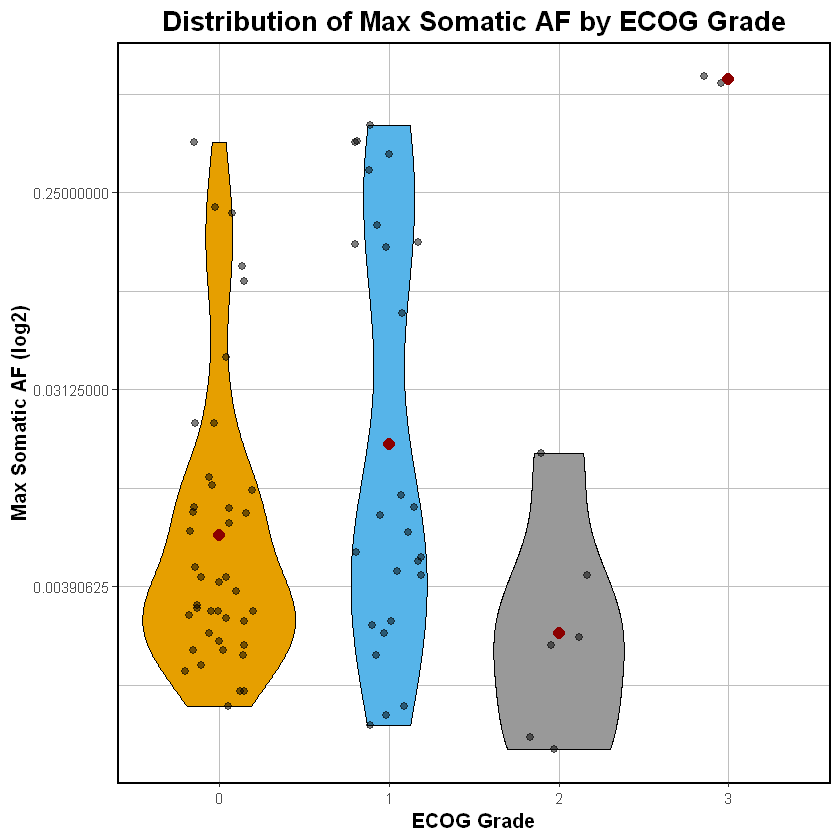

In [32]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Remove rows with NA values in 'Max Somatic AF' and 'ECOG'
df <- df[!is.na(df$`Max Somatic AF`) & !is.na(df$ECOG), ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'ECOG' is a factor with appropriate levels (if needed)
df$ECOG <- factor(df$ECOG, levels = sort(unique(df$ECOG)))


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#6A5ACD", "#20B2AA")  


if (nrow(df) > 0) {
  # Create violin plot with wider violins, log scale, and custom colors
  p <- ggplot(df, aes(x = ECOG, y = `Max Somatic AF`, fill = ECOG)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 0.9) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = "median", geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "ECOG Performance Status", y = "Max Somatic AF (log2)") +
    ggtitle("Distribution of Max Somatic AF by ECOG Performance Status") +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
  # Calculate and print Spearman correlation in the terminal
  spearman_corr <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$ECOG)), method = "spearman")
  cat("Spearman Correlation:", round(spearman_corr, 2), "\n")
  
 
  ggsave("C:/Users/hayae/Desktop/plot_max_somatic1.png", plot = p, width = 8, height = 6, units = "in", dpi = 300)
}


<h1><b>Biomarkers vs. ECOG (loc and met)</b></h1>

New names:
* `` -> ...3


 [1] "ID_CVK"                          "ID_CCM"                         
 [3] "...3"                            "Max Somatic AF"                 
 [5] "ctDNA Fraction"                  "ctDNA Unfiltered"               
 [7] "ctDNA Filtered"                  "TMB"                            
 [9] "MSI"                             "Disease Status"                 
[11] "Follow-up Disease Status"        "Metastatic Stage"               
[13] "Stage"                           "LocalizedMetastatic"            
[15] "ECOG"                            "ISUP"                           
[17] "HVLV"                            "HRLR"                           
[19] "iPSA"                            "PSA at ctDNA (or closest after)"
[21] "Dead "                           "1st Line Therapy"               
[23] "2nd Line of Therapy"             "3rd Line of Therapy"            
[25] "4th Line of Therapy"            


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


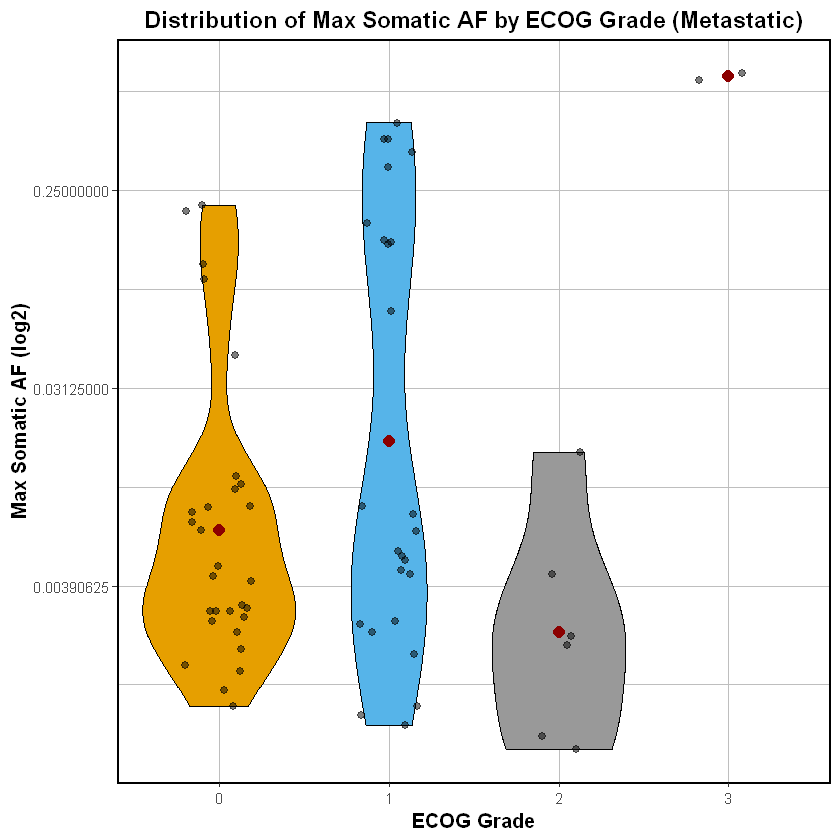

Spearman Correlation (Metastatic Patients): 0.08 
Spearman Correlation (Localized Patients): 0.31 


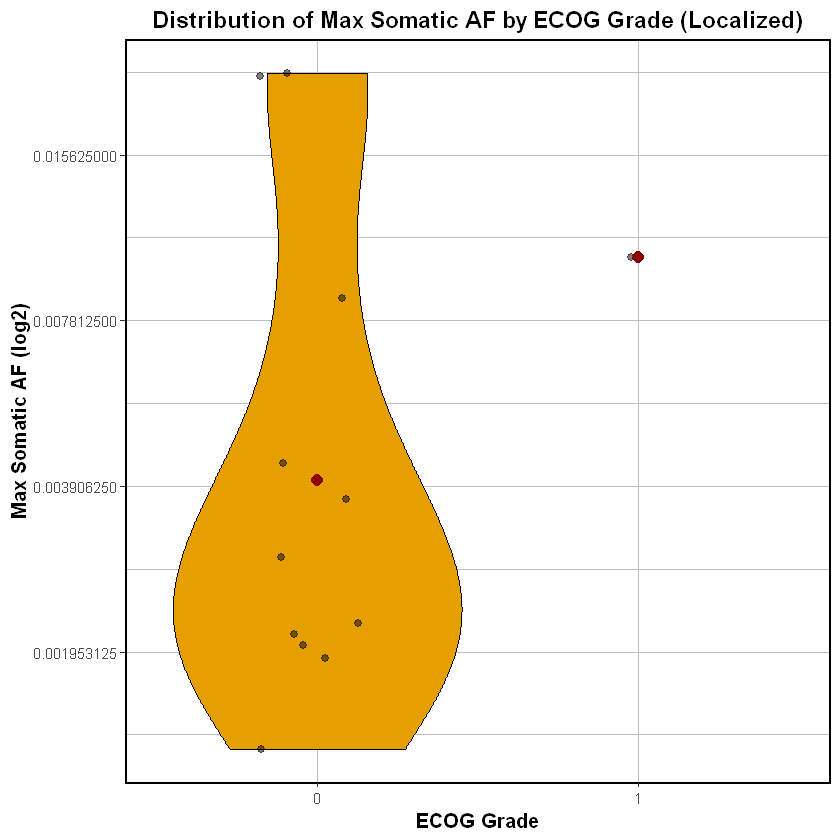

In [43]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

print(names(df))

# Rename columns for easier reference if needed
colnames(df)[which(names(df) == "")] <- "...3"

# Remove rows with NA values in 'ECOG' and 'Max Somatic AF'
df <- df[!is.na(df$ECOG) & !is.na(df$`Max Somatic AF`), ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'ECOG' is a factor with appropriate levels
df$ECOG <- factor(df$ECOG, levels = sort(unique(df$ECOG)))


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#6A5ACD", "#20B2AA")  

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {
  p <- ggplot(data, aes(x = ECOG, y = `Max Somatic AF`, fill = ECOG)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 0.9) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "ECOG Performance Status", y = "Max Somatic AF (log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Create and save plots for metastatic and localized patients
if (nrow(df_metastatic) > 0) {
  create_violin_plot(df_metastatic, "Distribution of Max Somatic AF by ECOG (Metastatic)", "C:/Users/hayae/Desktop/plot_metastatic.png")
}

if (nrow(df_localized) > 0) {
  create_violin_plot(df_localized, "Distribution of Max Somatic AF by ECOG (Localized)", "C:/Users/hayae/Desktop/plot_localized.png")
}

# Calculate and print Spearman correlation for metastatic patients
if (nrow(df_metastatic) > 0) {
  spearman_corr_metastatic <- cor(rank(df_metastatic$`Max Somatic AF`), rank(as.numeric(df_metastatic$ECOG)), method = "spearman")
  cat("Spearman Correlation (Metastatic Patients):", round(spearman_corr_metastatic, 2), "\n")
}

# Calculate and print Spearman correlation for localized patients
if (nrow(df_localized) > 0) {
  spearman_corr_localized <- cor(rank(df_localized$`Max Somatic AF`), rank(as.numeric(df_localized$ECOG)), method = "spearman")
  cat("Spearman Correlation (Localized Patients):", round(spearman_corr_localized, 2), "\n")
}


<h1><b>Biomarkers vs. Stage (loc and met)</b></h1>

New names:
* `` -> ...3


 [1] "ID_CVK"                          "ID_CCM"                         
 [3] "...3"                            "Max Somatic AF"                 
 [5] "ctDNA Fraction"                  "ctDNA Unfiltered"               
 [7] "ctDNA Filtered"                  "TMB"                            
 [9] "MSI"                             "Disease Status"                 
[11] "Follow-up Disease Status"        "Metastatic Stage"               
[13] "Stage"                           "LocalizedMetastatic"            
[15] "ECOG"                            "ISUP"                           
[17] "HVLV"                            "HRLR"                           
[19] "iPSA"                            "PSA at ctDNA (or closest after)"
[21] "Dead "                           "1st Line Therapy"               
[23] "2nd Line of Therapy"             "3rd Line of Therapy"            
[25] "4th Line of Therapy"            


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


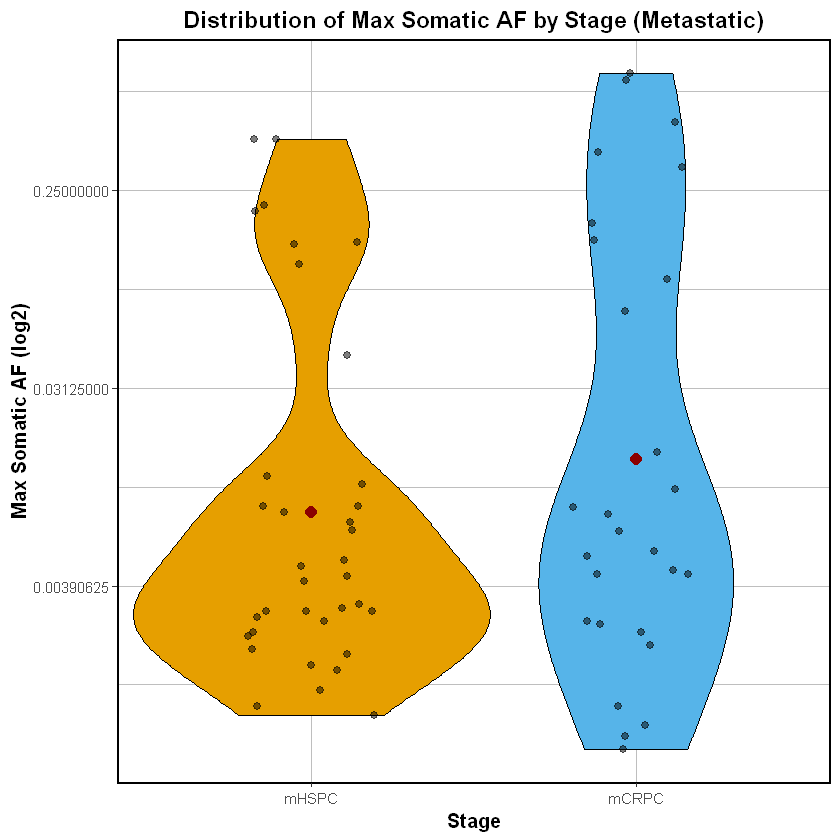

Spearman Correlation (Metastatic Patients): 0.11 
Spearman Correlation (Localized Patients): 0.31 


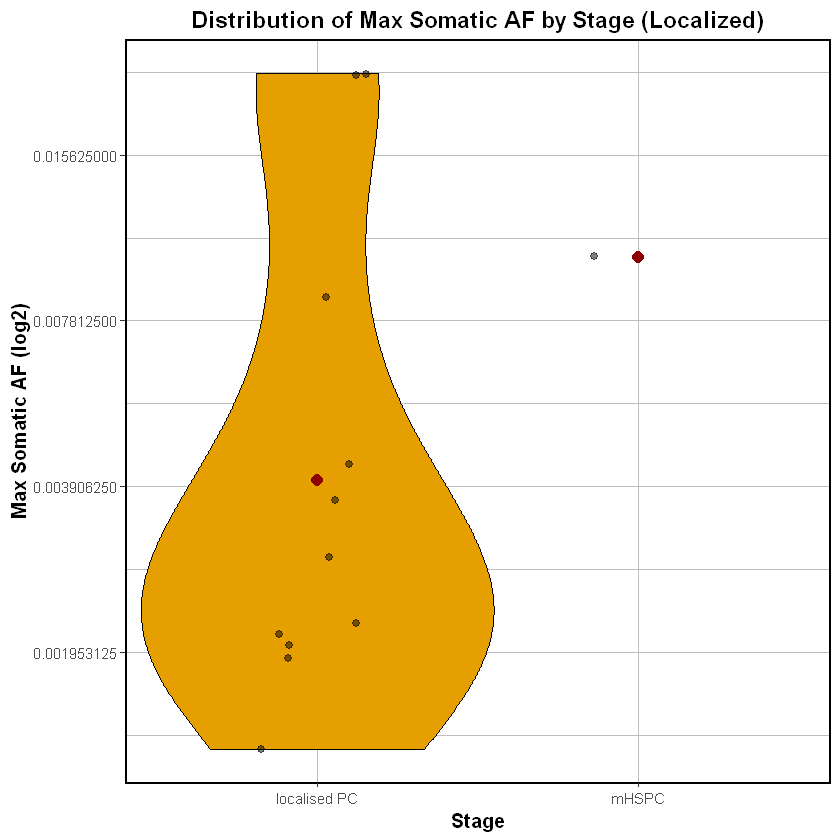

In [50]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

print(names(df))

# Rename columns for easier reference if needed
colnames(df)[which(names(df) == "")] <- "...3"

# Remove rows with NA values in 'Stage' and 'Max Somatic AF'
df <- df[!is.na(df$Stage) & !is.na(df$`Max Somatic AF`), ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'Stage' is a factor with appropriate levels
df$Stage <- factor(df$Stage, levels = c("localised PC", "mHSPC", "nmCRPC", "mCRPC"))


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#FFD700")  

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {
  p <- ggplot(data, aes(x = Stage, y = `Max Somatic AF`, fill = Stage)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 1.1) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "Stage", y = "Max Somatic AF (log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Create and save plots for metastatic and localized patients
if (nrow(df_metastatic) > 0) {
  create_violin_plot(df_metastatic, "Distribution of Max Somatic AF by Stage (Metastatic)", "C:/Users/hayae/Desktop/plot_metastatic.png")
}

if (nrow(df_localized) > 0) {
  create_violin_plot(df_localized, "Distribution of Max Somatic AF by Stage (Localized)", "C:/Users/hayae/Desktop/plot_localized.png")
}

# Calculate and print Spearman correlation for metastatic patients
if (nrow(df_metastatic) > 0) {
  spearman_corr_metastatic <- cor(rank(df_metastatic$`Max Somatic AF`), rank(as.numeric(df_metastatic$Stage)), method = "spearman")
  cat("Spearman Correlation (Metastatic Patients):", round(spearman_corr_metastatic, 2), "\n")
}

# Calculate and print Spearman correlation for localized patients
if (nrow(df_localized) > 0) {
  spearman_corr_localized <- cor(rank(df_localized$`Max Somatic AF`), rank(as.numeric(df_localized$Stage)), method = "spearman")
  cat("Spearman Correlation (Localized Patients):", round(spearman_corr_localized, 2), "\n")
}


<h1><b>Biomarkers vs. Stage</b></h1>

New names:
* `` -> ...3


 [1] "ID_CVK"                   "ID_CCM"                  
 [3] "...3"                     "Max Somatic AF"          
 [5] "ctDNA Fraction"           "ctDNA Unfiltered"        
 [7] "ctDNA Filtered"           "TMB"                     
 [9] "MSI"                      "Disease Status"          
[11] "Follow-up Disease Status" "Metastatic Stage"        
[13] "Stage"                    "LocalizedMetastatic"     
[15] "ECOG"                     "ISUP"                    
[17] "STAMPEDE"                 "LATITUDE"                
[19] "iPSA"                     "PSA at ctDNA"            
[21] "Dead "                    "1st Line Therapy"        
[23] "2nd Line of Therapy"      "3rd Line of Therapy"     
[25] "4th Line of Therapy"      "Total Lines of Therapy"  


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"

Spearman Correlation (All Patients): 0.21 


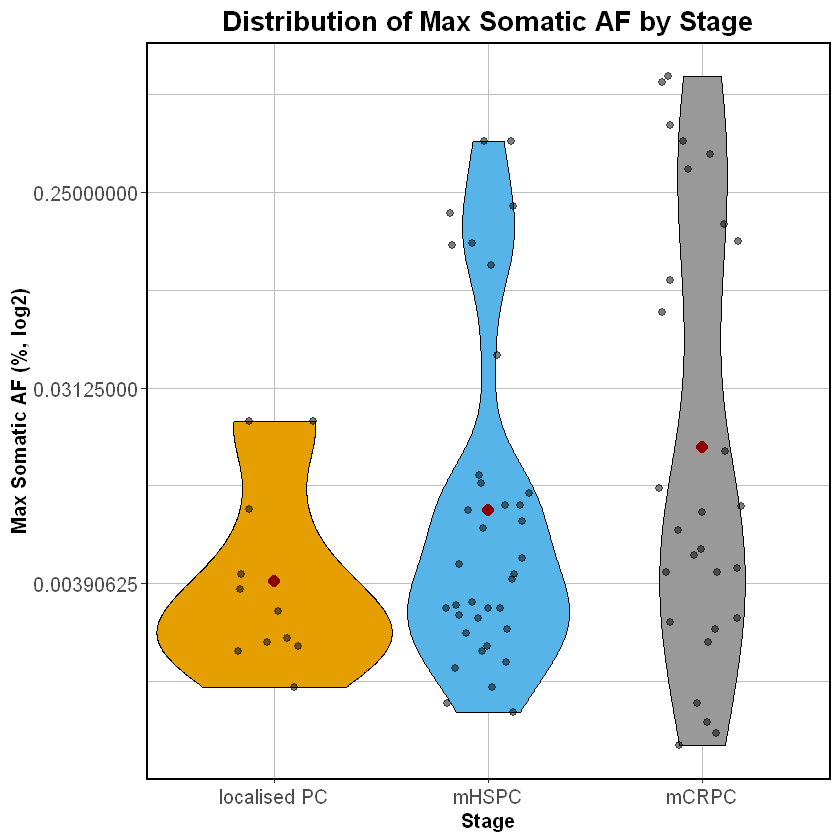

In [13]:
library(ggplot2)
library(readxl)
library(dplyr)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")


print(names(df))

# Remove rows with NA values in 'Stage' and 'Max Somatic AF'
df <- df[!is.na(df$Stage) & !is.na(df$`Max Somatic AF`), ]

df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'Stage' is a factor with appropriate levels
df$Stage <- factor(df$Stage, levels = c("localised PC", "mHSPC", "nmCRPC", "mCRPC"))


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#FFD700")  

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {
  data <- data[!is.na(data$`Max Somatic AF`) & !is.na(data$Stage), ]
  
  p <- ggplot(data, aes(x = Stage, y = `Max Somatic AF`, fill = Stage)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 1.1) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "Stage", y = "Max Somatic AF (%, log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          axis.text = element_text(size = 12),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Create and save a combined plot for all patients
if (nrow(df) > 0) {
  create_violin_plot(df, "Distribution of Max Somatic AF by Stage", "C:/Users/hayae/Desktop/plot_Max_Somatic_AF_by_Stage.png")
}

# Calculate and print Spearman correlation for all patients
if (nrow(df) > 0) {
  spearman_corr_all <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$Stage)), method = "spearman")
  cat("Spearman Correlation (All Patients):", round(spearman_corr_all, 2), "\n")
}


<h1><b>Biomarkers vs. Total Lines of Therapy</b></h1>


New names:
* `` -> ...3


 [1] "ID_CVK"                          "ID_CCM"                         
 [3] "...3"                            "Max Somatic AF"                 
 [5] "ctDNA Fraction"                  "ctDNA Unfiltered"               
 [7] "ctDNA Filtered"                  "TMB"                            
 [9] "MSI"                             "Disease Status"                 
[11] "Follow-up Disease Status"        "Metastatic Stage"               
[13] "Stage"                           "LocalizedMetastatic"            
[15] "ECOG"                            "ISUP"                           
[17] "HVLV"                            "HRLR"                           
[19] "iPSA"                            "PSA at ctDNA (or closest after)"
[21] "Dead "                           "1st Line Therapy"               
[23] "2nd Line of Therapy"             "3rd Line of Therapy"            
[25] "4th Line of Therapy"             "Total Lines of Therapy"         


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"No summary function supplied, defaulting to `mean_se()
Warning message:
"position_dodge requires non-overlapping x intervals"

Spearman Correlation (All Patients): 0.04 


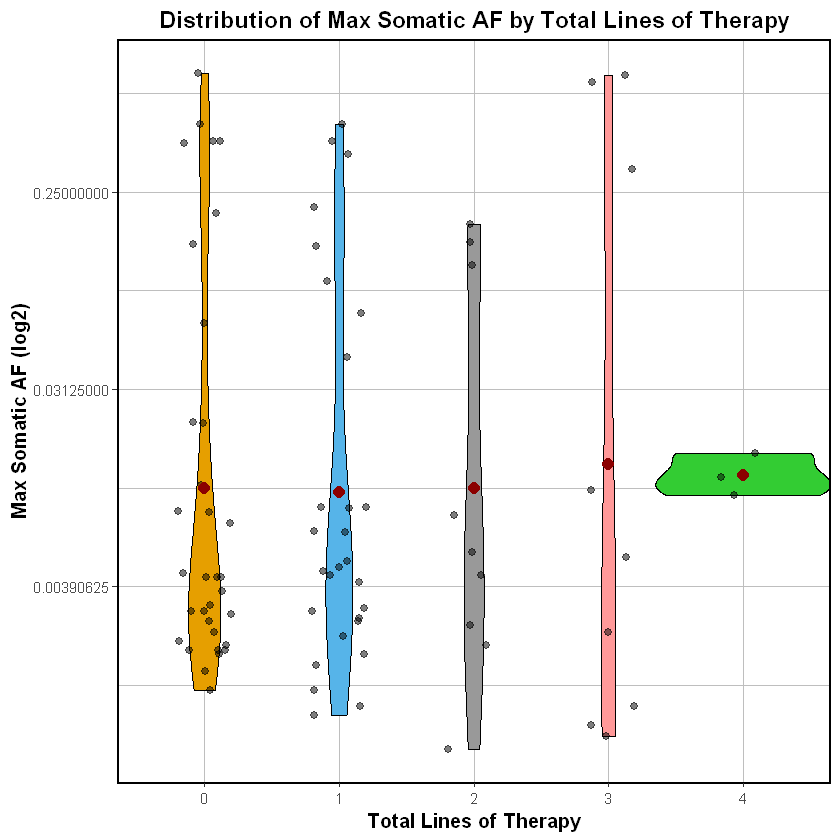

In [77]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

colnames(df)[which(names(df) == "")] <- "...3"

# Remove rows with NA values
df <- df[!is.na(df$`Max Somatic AF`) & !is.na(df$`Max Somatic AF`), ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'Max Somatic AF' is a factor with appropriate levels
df$`Total Lines of Therapy` <- factor(df$`Total Lines of Therapy`, levels = c("0", "1", "2", "3", "4"))


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33")  # Match colors to image

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {

  data <- data[!is.na(data$`Max Somatic AF`) & !is.na(data$`Total Lines of Therapy`), ]
  
  p <- ggplot(data, aes(x = `Total Lines of Therapy`, y = `Max Somatic AF`, fill = `Total Lines of Therapy`)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 1.3) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "Total Lines of Therapy", y = "Max Somatic AF (log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Create and save a combined plot for all patients
if (nrow(df) > 0) {
  create_violin_plot(df, "Distribution of Max Somatic AF by Total Lines of Therapy", "C:/Users/hayae/Desktop/plot_Max_Somatic_AF_all.png")
}

# Calculate and print Spearman correlation for all patients
if (nrow(df) > 0) {
  spearman_corr_all <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$`Total Lines of Therapy`)), method = "spearman")
  cat("Spearman Correlation (All Patients):", round(spearman_corr_all, 2), "\n")
}


<h1><b>Biomarkers vs. Total Lines of Therapy (loc and met)</b></h1>


New names:
* `` -> ...3


 [1] "ID_CVK"                   "ID_CCM"                  
 [3] "...3"                     "Max Somatic AF"          
 [5] "ctDNA Fraction"           "ctDNA Unfiltered"        
 [7] "ctDNA Filtered"           "TMB"                     
 [9] "MSI"                      "Disease Status"          
[11] "Follow-up Disease Status" "Metastatic Stage"        
[13] "Stage"                    "LocalizedMetastatic"     
[15] "ECOG"                     "ISUP"                    
[17] "STAMPEDE"                 "LATITUDE"                
[19] "iPSA"                     "PSA at ctDNA"            
[21] "Dead "                    "1st Line Therapy"        
[23] "2nd Line of Therapy"      "3rd Line of Therapy"     
[25] "4th Line of Therapy"      "Total Lines of Therapy"  


Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


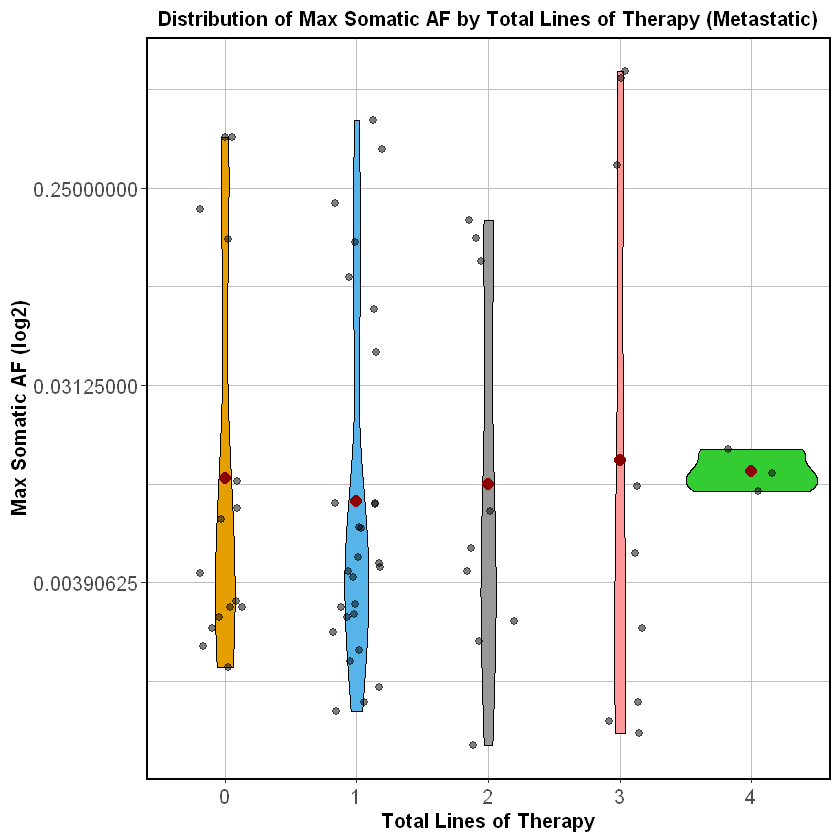

Spearman Correlation (Metastatic Patients): 0.04 


Warning message in cor(rank(df_localized$`Max Somatic AF`), rank(as.numeric(df_localized$`Total Lines of Therapy`)), :
"the standard deviation is zero"

Spearman Correlation (Localized Patients): NA 
Spearman Correlation (All Patients): 0.11 


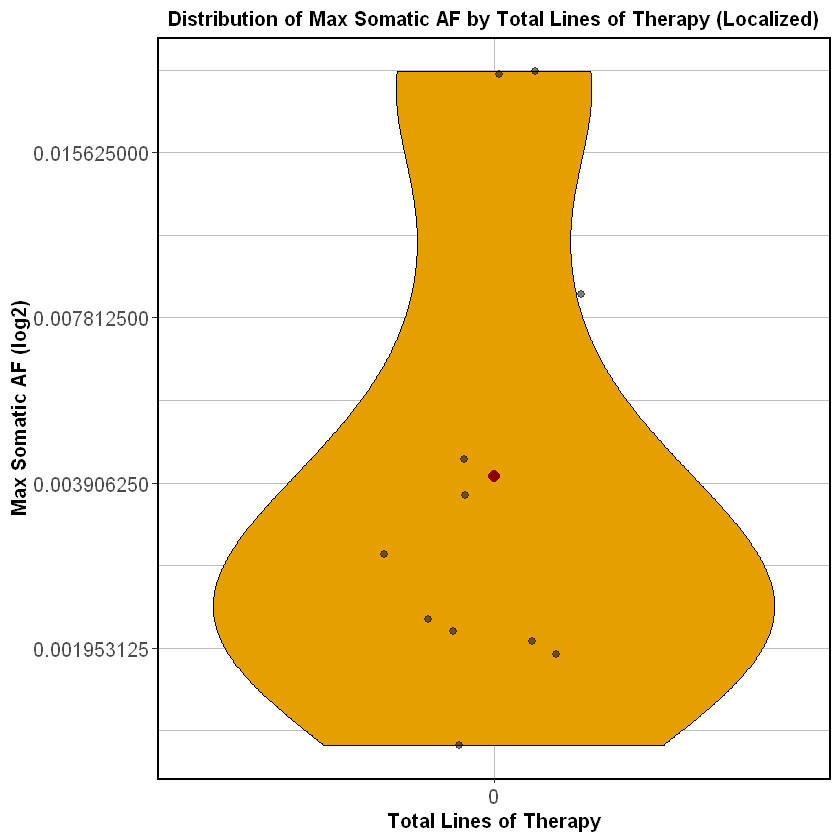

In [212]:
library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")


print(names(df))
colnames(df)[which(names(df) == "")] <- "...3"

# Remove rows with NA values in 'Max Somatic AF' and 'Total Lines of Therapy'
df <- df[!is.na(df$`Max Somatic AF`) & !is.na(df$`Total Lines of Therapy`), ]


df$`Max Somatic AF` <- as.numeric(gsub(",", ".", df$`Max Somatic AF`))

# Remove rows where conversion to numeric resulted in NA values
df <- df[!is.na(df$`Max Somatic AF`), ]

# Ensure 'Total Lines of Therapy' is a factor with appropriate levels
df$`Total Lines of Therapy` <- factor(df$`Total Lines of Therapy`, levels = sort(unique(df$`Total Lines of Therapy`)))

# Filter out rows with NA values in 'LocalizedMetastatic'
df <- df[!is.na(df$LocalizedMetastatic), ]


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#FFD700")  

# Function to create violin plot
create_violin_plot <- function(data, title, filename) {
  p <- ggplot(data, aes(x = `Total Lines of Therapy`, y = `Max Somatic AF`, fill = `Total Lines of Therapy`)) +
    geom_violin(color = "black", draw_quantiles = NULL, width = 1.0) +  
    geom_point(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +  
    stat_summary(fun = median, geom = "point", size = 3, color = "darkred", shape = 16, position = position_dodge(width = 0.75)) +  
    scale_fill_manual(values = my_colors) +  
    scale_y_continuous(trans = 'log2') +
    labs(x = "Total Lines of Therapy", y = "Max Somatic AF (log2)") +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),  
          axis.title.x = element_text(size = 12, face = "bold"),  
          axis.title.y = element_text(size = 12, face = "bold"),  
          axis.text = element_text(size = 12),  
          panel.background = element_rect(fill = "white", color = "black"),  
          panel.grid.major = element_line(color = "gray", size = 0.5),  
          panel.grid.minor = element_line(color = "gray", size = 0.25),  
          panel.border = element_rect(color = "black", fill = NA, size = 1)) +  
    theme(legend.position = "none") 
  

  print(p)
  
 
  ggsave(filename, plot = p, width = 8, height = 6, units = "in", dpi = 300)
}

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Create and save plots for metastatic and localized patients
if (nrow(df_metastatic) > 0) {
  create_violin_plot(df_metastatic, "Distribution of Max Somatic AF by Total Lines of Therapy (Metastatic)", "C:/Users/hayae/Desktop/plot_metastatic.png")
}

if (nrow(df_localized) > 0) {
  create_violin_plot(df_localized, "Distribution of Max Somatic AF by Total Lines of Therapy (Localized)", "C:/Users/hayae/Desktop/plot_localized.png")
}

# Calculate and print Spearman correlation for metastatic patients
if (nrow(df_metastatic) > 0) {
  spearman_corr_metastatic <- cor(rank(df_metastatic$`Max Somatic AF`), rank(as.numeric(df_metastatic$`Total Lines of Therapy`)), method = "spearman")
  cat("Spearman Correlation (Metastatic Patients):", round(spearman_corr_metastatic, 2), "\n")
}

# Calculate and print Spearman correlation for localized patients
if (nrow(df_localized) > 0) {
  spearman_corr_localized <- cor(rank(df_localized$`Max Somatic AF`), rank(as.numeric(df_localized$`Total Lines of Therapy`)), method = "spearman")
  cat("Spearman Correlation (Localized Patients):", round(spearman_corr_localized, 2), "\n")
}

# Calculate and print Spearman correlation for all patients
if (nrow(df) > 0) {
  spearman_corr_all <- cor(rank(df$`Max Somatic AF`), rank(as.numeric(df$`Total Lines of Therapy`)), method = "spearman")
  cat("Spearman Correlation (All Patients):", round(spearman_corr_all, 2), "\n")
}


<h1><b>Biomarkers Overall Impact</b></h1>

In [4]:

library(readxl)
library(ggplot2)



df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")


# Recode 'STAMPEDE' and 'LATITUDE' to numeric values
df <- df %>%
  mutate(STAMPEDE = case_when(
    STAMPEDE == "High" ~ 2,
    STAMPEDE == "Low" ~ -2,
    TRUE ~ NA_real_
  )) %>%
  mutate(LATITUDE = case_when(
    LATITUDE == "High" ~ 2,
    LATITUDE == "Low" ~ -2,
    TRUE ~ NA_real_
  ))

# Recode 'Stage' to numeric values
df <- df %>%
  mutate(Stage = case_when(
    Stage == "localised PC" ~ 1,
    Stage == "mHSPC" ~ 2,
    Stage == "nmCRPC" ~ 3,
    Stage == "mCRPC" ~ 4,
    TRUE ~ NA_real_
  ))

# Recode 'Disease Status' to numeric values
df <- df %>%
  mutate(`Disease Status` = case_when(
    `Disease Status` == "CR" ~ -2,
    `Disease Status` == "PD" ~ 3,
    `Disease Status` == "PD/PR" ~ 2,
    `Disease Status` == "SD" ~ 0,
    `Disease Status` == "non-PD" ~ 1,
    TRUE ~ NA_real_
  ))

# Recode 'Follow-up Disease Status' to numeric values
df <- df %>%
  mutate(`Follow-up Disease Status` = case_when(
    `Follow-up Disease Status` == "CR" ~ -2,
    `Follow-up Disease Status` == "PD" ~ 3,
    `Follow-up Disease Status` == "PD/PR" ~ 2,
    `Follow-up Disease Status` == "SD" ~ 0,
    `Follow-up Disease Status` == "non-PD" ~ 1,
    TRUE ~ NA_real_
  ))

# Fit linear regression model
lm_model <- lm(`ctDNA Unfiltered` ~ iPSA + `PSA at ctDNA` + ISUP + STAMPEDE + LATITUDE + `Total Lines of Therapy` + Stage + `Disease Status` + `Follow-up Disease Status`, data = df)

# Extract coefficients and confidence intervals
coef_table <- data.frame(
  Predictor = names(coef(lm_model)),
  Estimate = coef(lm_model),
  Std_Error = summary(lm_model)$coef[, "Std. Error"]
)
coef_table$LowerCI <- coef_table$Estimate - 1.96 * coef_table$Std_Error
coef_table$UpperCI <- coef_table$Estimate + 1.96 * coef_table$Std_Error

# Filter out 'intercept'
coef_table <- coef_table[coef_table$Predictor != "(Intercept)", ]

# Define the x-coordinate for the quantitative value text
quantitative_x <- 0.0

# Plot the coefficients and confidence intervals with quantitative values
plot <- ggplot(coef_table, aes(x = Estimate, y = reorder(Predictor, Estimate))) +
  geom_point(size = 3) +  # Increase point size
  geom_errorbarh(aes(xmin = LowerCI, xmax = UpperCI), height = 0.3, size = 1.0) +  # Adjust error bar thickness and height
  geom_vline(xintercept = quantitative_x, linetype = "dashed", color = "red", size = 1.5) +  # Increase red line thickness
  geom_text(aes(x = Estimate, y = Predictor, label = sprintf("%.2f", Estimate)), hjust = -0.3, vjust = -0.5, size = 3, fontface = "bold") +  # Adjust text labels to be slightly above the estimate line
  labs(title = "Overall Impact of ctDNA on Clinical Attributes (95% CI)", 
       x = "Estimate", 
       y = "Predictor") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),  # Center title, bold, larger size
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10)  # Increase axis tick text size
  )


ggsave("C:/Users/hayae/Desktop/plot_output.png", plot, width = 8, height = 6, dpi = 300)


SyntaxError: invalid syntax (1504323278.py, line 11)

New names:
* `` -> ...3
Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."

Pearson correlation: NA 


Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."

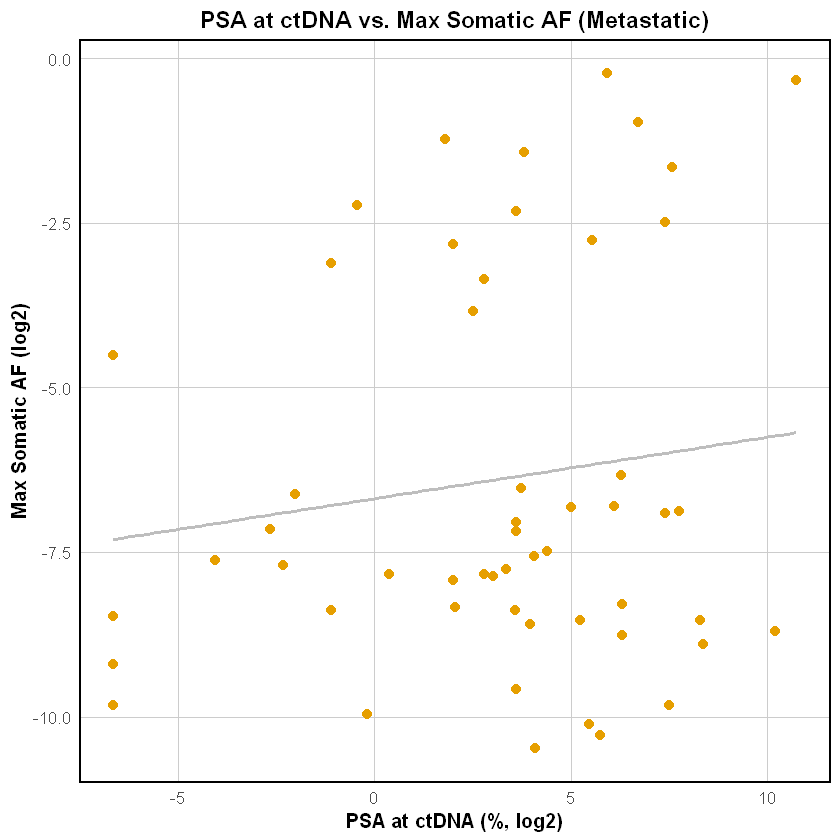

Pearson correlation: NA 


Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

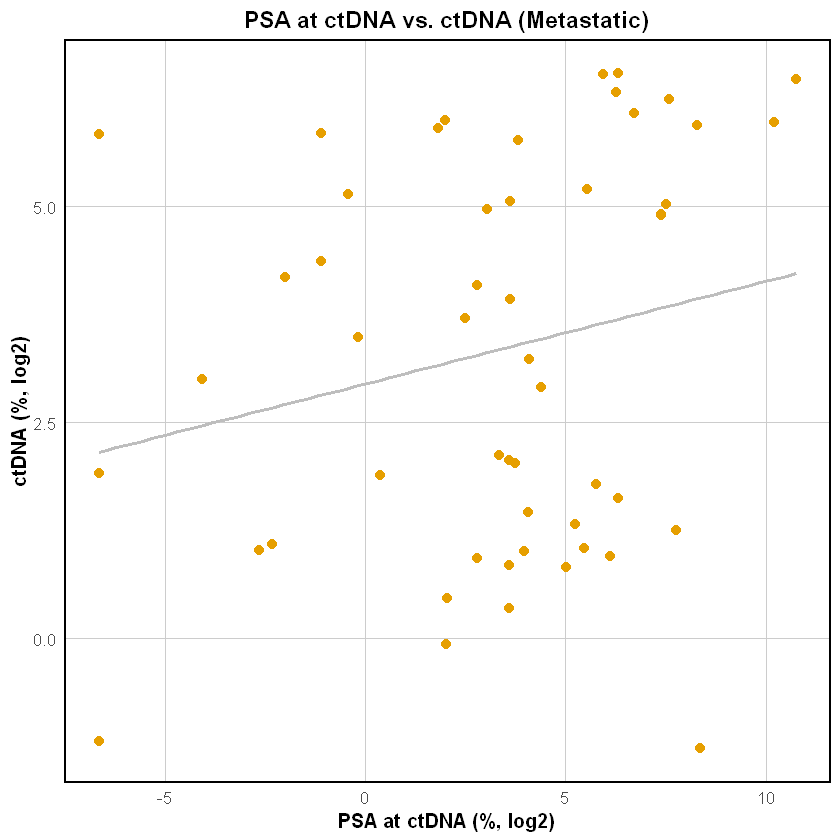

Pearson correlation: NA 


Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

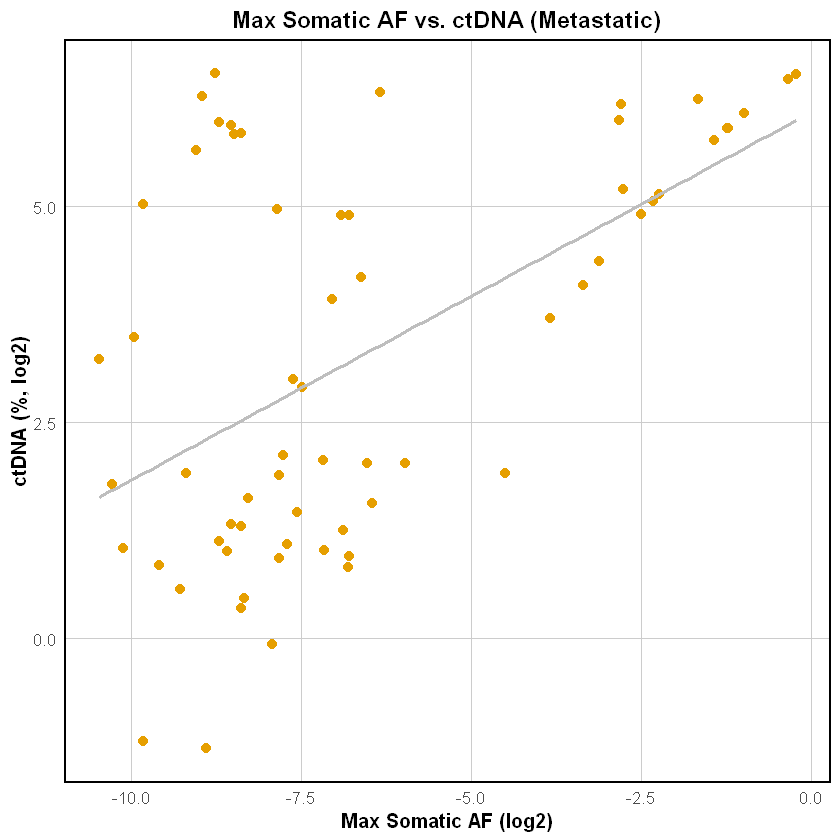

Pearson correlation: NA 


Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

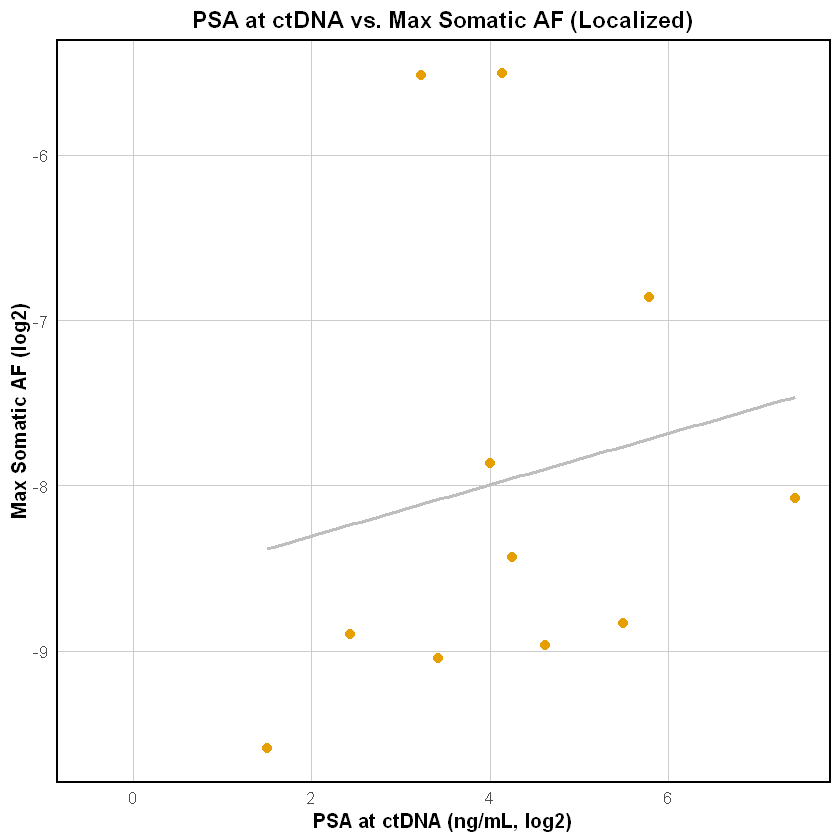

Pearson correlation: NA 


Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

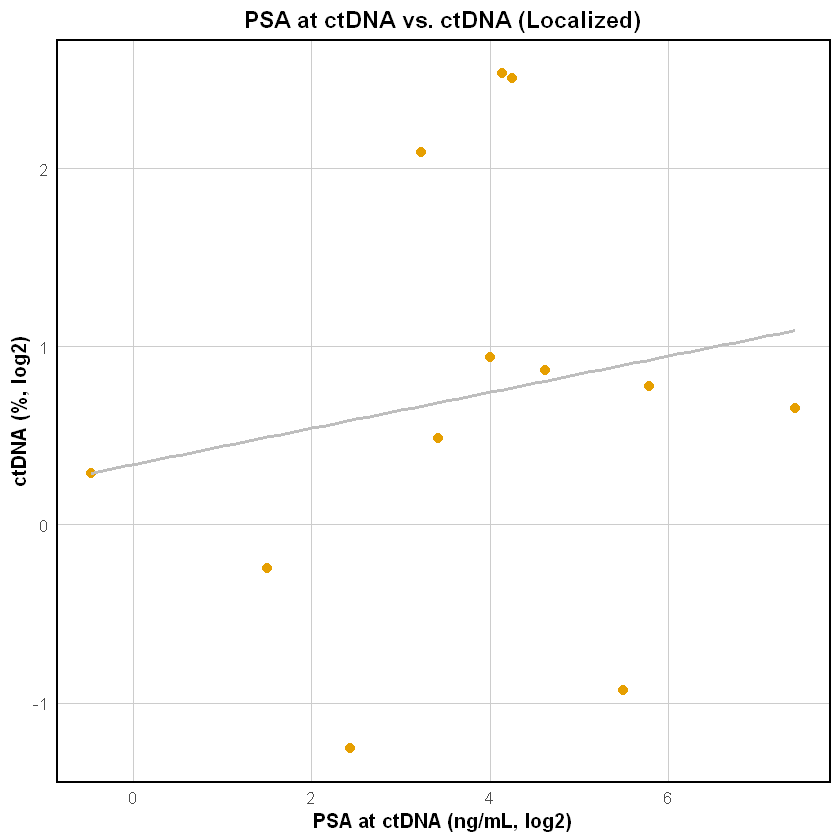

Pearson correlation: NA 


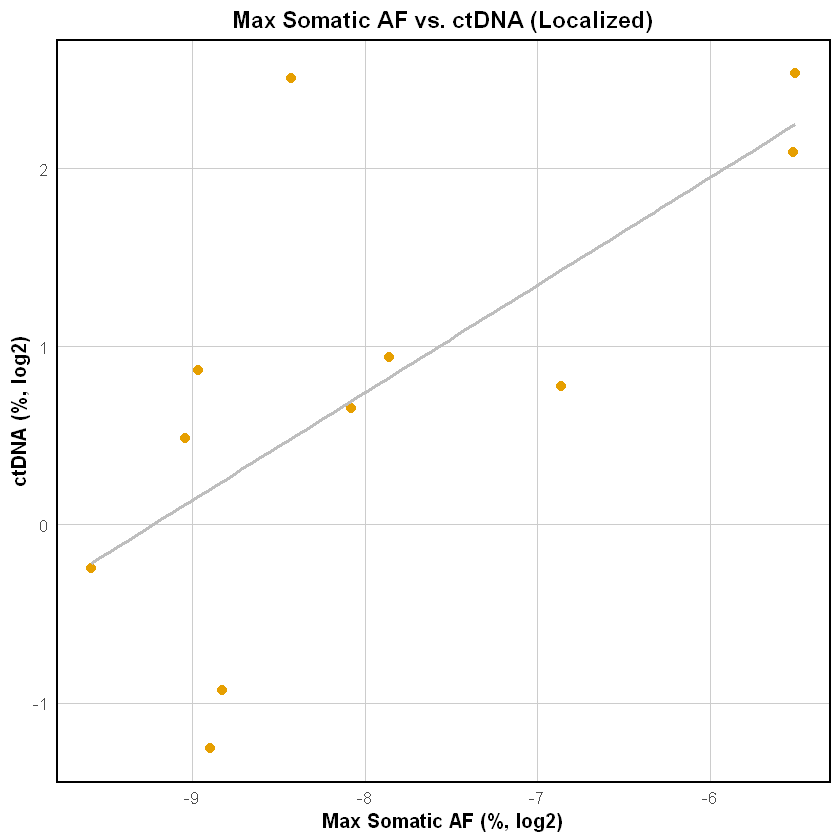

In [217]:

library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Transform variables to log2 if needed
df$log2_iPSA_Max Somatic AF <- log2(df$`iPSA`)
df$log2_Max_Somatic_AF <- log2(df$`Max Somatic AF`)
df$log2_Max Somatic AF <- log2(df$`Max Somatic AF`)


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#FFD700")  

# Function to create scatter plot with linear regression and calculate correlation
create_scatter_plot <- function(data, x_var, y_var, x_label = NULL, y_label = NULL, title, filename, method = "pearson") {
  # Create scatter plot with linear regression
  p <- ggplot(data, aes_string(x = x_var, y = y_var)) +
    geom_point(color = "#E69F00", size = 2.5) +  # Set point color and size
    geom_smooth(method = "lm", se = FALSE, color = "grey") +  # Add linear regression line
    labs(x = ifelse(!is.null(x_label), x_label, gsub("_", " ", x_var)),  # Adjust x-axis label if specified
         y = ifelse(!is.null(y_label), y_label, gsub("_", " ", y_var)),  # Adjust y-axis label if specified
         title = title) +
    ggtitle(title) +
    theme_minimal() +
    theme(
      panel.grid.major = element_line(color = "grey80"),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white"),
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  # Bold and centered title
      axis.title.x = element_text(size = 12, face = "bold"),  
      axis.title.y = element_text(size = 12, face = "bold"),  
      axis.text = element_text(size = 10),  # Adjust tick label size
      axis.line = element_line(color = "black"),  # Add axis lines
      panel.border = element_rect(color = "black", fill = NA, size = 1)  
    )
  

  print(p)
  
  with a unique filename in the specified directory
  ggsave(file.path("C:/Users/hayae/Desktop", filename), plot = p, width = 8, height = 6, units = "in", dpi = 300)
  
  # Calculate correlation
  if (method == "pearson") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "pearson")
    cat("Pearson correlation:", round(corr, 2), "\n")
  } else if (method == "spearman") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "spearman")
    cat("Spearman correlation:", round(corr, 2), "\n")
  } else {
    stop("Invalid correlation method specified. Choose 'pearson' or 'spearman'.")
  }
}

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Create and save plots for metastatic patients
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA (%, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSA vs. Max Somatic AF (Metastatic)", filename = "plot_metastatic_1.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA (%, log2)", y_label = "Max Somatic AF (%, log2)",
                    title = "iPSA vs. Max Somatic AF (Metastatic)", filename = "plot_metastatic_2.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (log2)", y_label = "Max Somatic AF (%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF (Metastatic)", filename = "plot_metastatic_3.png", method = "pearson")

# Create and save plots for localized patients
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA (ng/mL, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSA vs. Max Somatic AF (Localized)", filename = "plot_localized_1.png", method = "pearson")
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA (ng/mL, log2)", y_label = "Max Somatic AF (%, log2)",
                    title = "iPSA vs. Max Somatic AF (Localized)", filename = "plot_localized_2.png", method = "pearson")
create_scatter_plot(df_localized, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (%, log2)", y_label = "Max Somatic AF (%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF (Localized)", filename = "plot_localized_3.png", method = "pearson")


In [ ]:

library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Transform variables to log2 if needed
df$log2_iPSA_Max Somatic AF<- log2(df$`iPSA`)
df$log2_Max_Somatic_AF <- log2(df$`Max Somatic AF`)
df$log2_Max Somatic AF<- log2(df$`Max Somatic AF`)


my_colors <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#33cc33", "#8B4513", "#FFD700")  

# Function to create scatter plot with linear regression and calculate correlation
create_scatter_plot <- function(data, x_var, y_var, x_label = NULL, y_label = NULL, title, filename, method = "pearson") {
  # Create scatter plot with linear regression
  p <- ggplot(data, aes_string(x = x_var, y = y_var)) +
    geom_point(color = "#E69F00", size = 2.5) +  # Set point color and size
    geom_smooth(method = "lm", se = FALSE, color = "grey") +  # Add linear regression line
    labs(x = ifelse(!is.null(x_label), x_label, gsub("_", " ", x_var)),  # Adjust x-axis label if specified
         y = ifelse(!is.null(y_label), y_label, gsub("_", " ", y_var)),  # Adjust y-axis label if specified
         title = title) +
    ggtitle(title) +
    theme_minimal() +
    theme(
      panel.grid.major = element_line(color = "grey80"),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white"),
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  # Bold and centered title
      axis.title.x = element_text(size = 12, face = "bold"),  
      axis.title.y = element_text(size = 12, face = "bold"),  
      axis.text = element_text(size = 10),  # Adjust tick label size
      axis.line = element_line(color = "black"),  # Add axis lines
      panel.border = element_rect(color = "black", fill = NA, size = 1)  
    )
  

  print(p)
  
  with a unique filename in the specified directory
  ggsave(file.path("C:/Users/hayae/Desktop", filename), plot = p, width = 8, height = 6, units = "in", dpi = 300)
  
  # Calculate correlation
  if (method == "pearson") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "pearson")
    cat("Pearson correlation:", round(corr, 2), "\n")
  } else if (method == "spearman") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "spearman")
    cat("Spearman correlation:", round(corr, 2), "\n")
  } else {
    stop("Invalid correlation method specified. Choose 'pearson' or 'spearman'.")
  }
}

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Create and save plots for metastatic patients
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSAvs. Max Somatic AF (Metastatic)", filename = "plot_metastatic_1.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "iPSAvs. Max Somatic AF(Metastatic)", filename = "plot_metastatic_2.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF(Metastatic)", filename = "plot_metastatic_3.png", method = "pearson")

# Create and save plots for localized patients
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSAvs. Max Somatic AF (Localized)", filename = "plot_localized_1.png", method = "pearson")
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "iPSAvs. Max Somatic AF(Localized)", filename = "plot_localized_2.png", method = "pearson")
create_scatter_plot(df_localized, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF(Localized)", filename = "plot_localized_3.png", method = "person")




<h1><b>PSA and iPSA<b></h1>

New names:
* `` -> ...3
Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."

Pearson correlation: NA 


Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."Warning message:
"Removed 18 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 18 rows containing missing values (geom_point)."

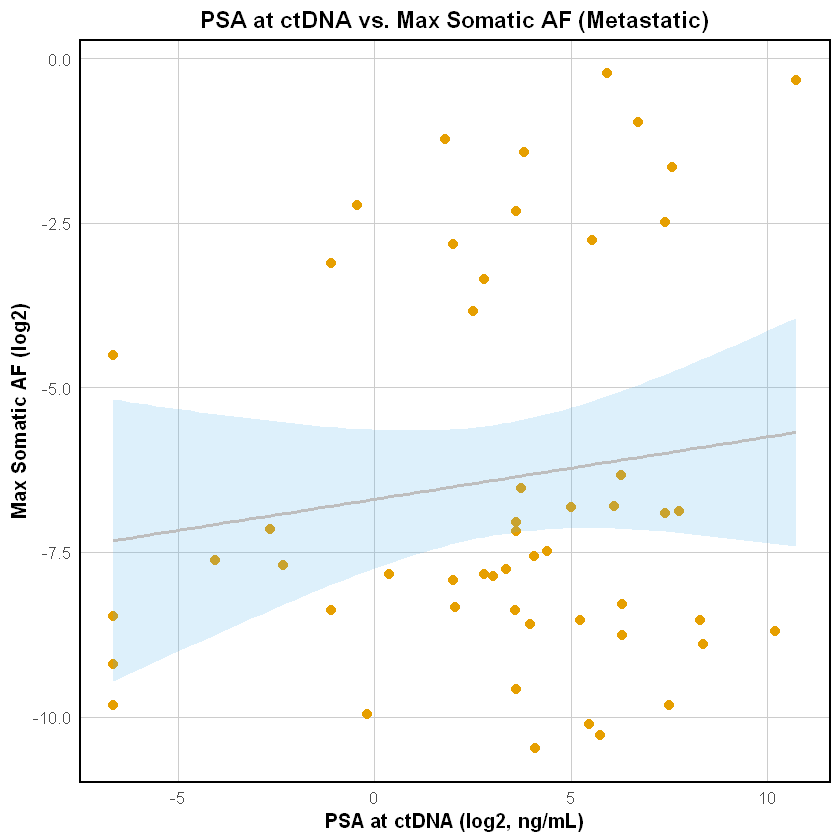

Pearson correlation: NA 


Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

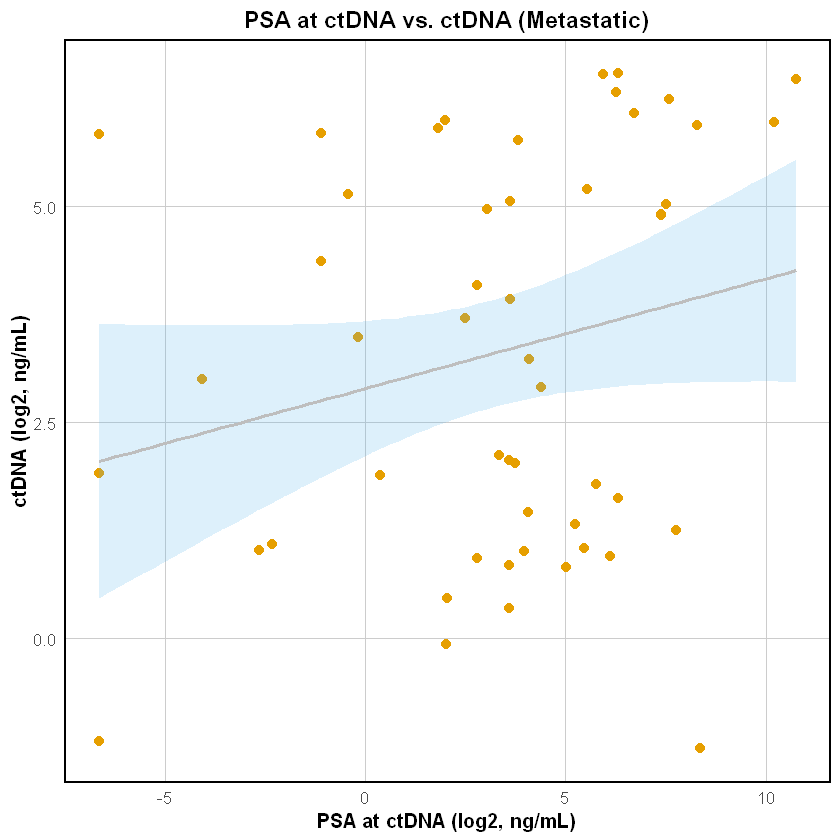

Pearson correlation: NA 


Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

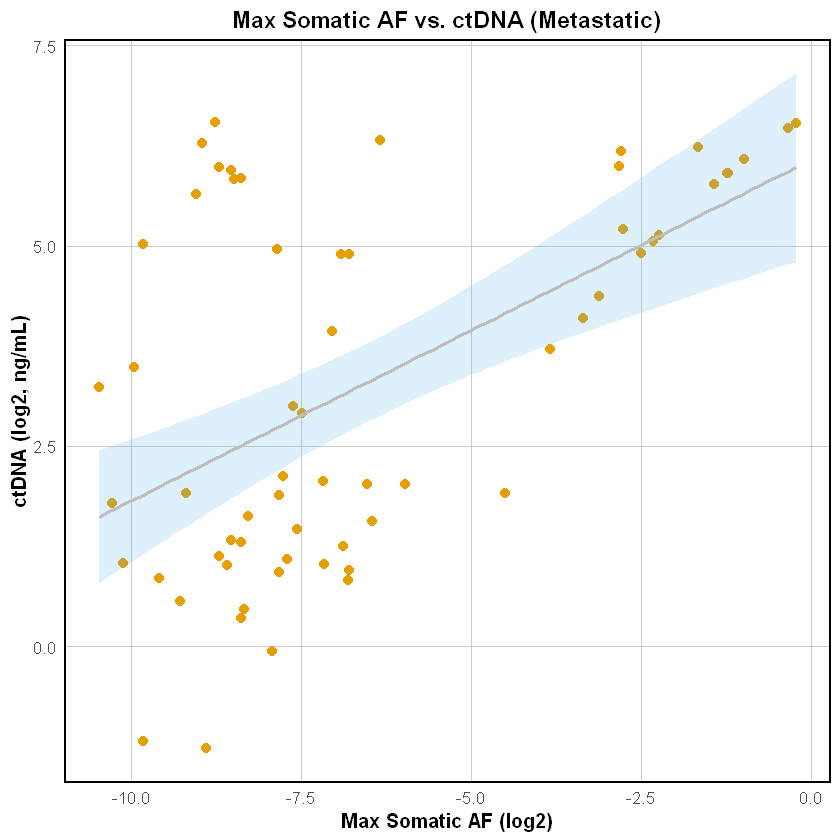

Pearson correlation: NA 


Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

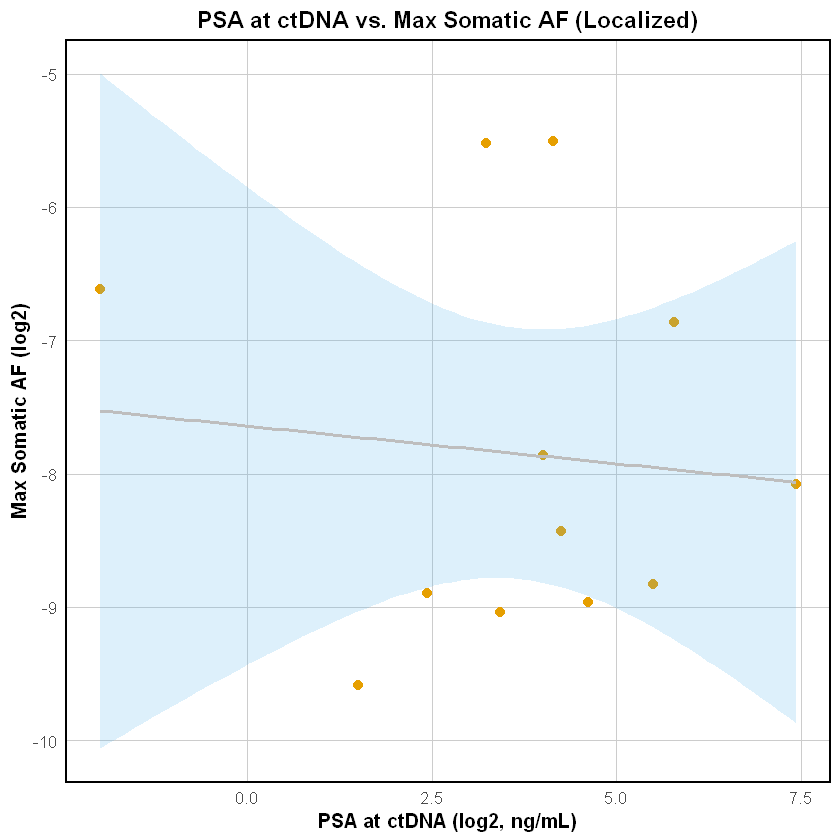

Pearson correlation: NA 


Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

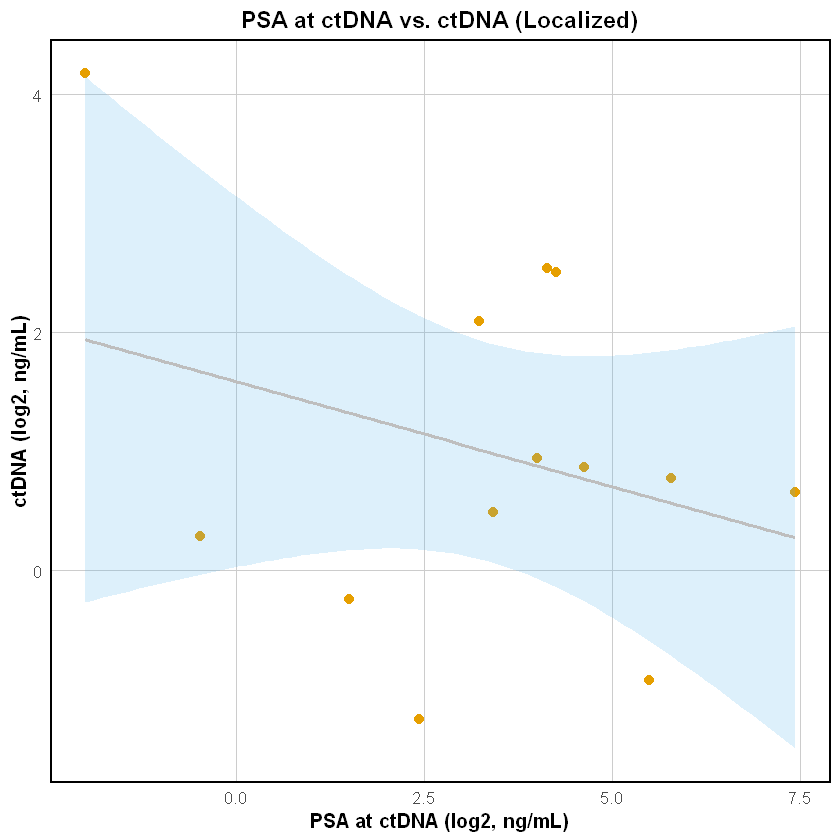

Pearson correlation: NA 


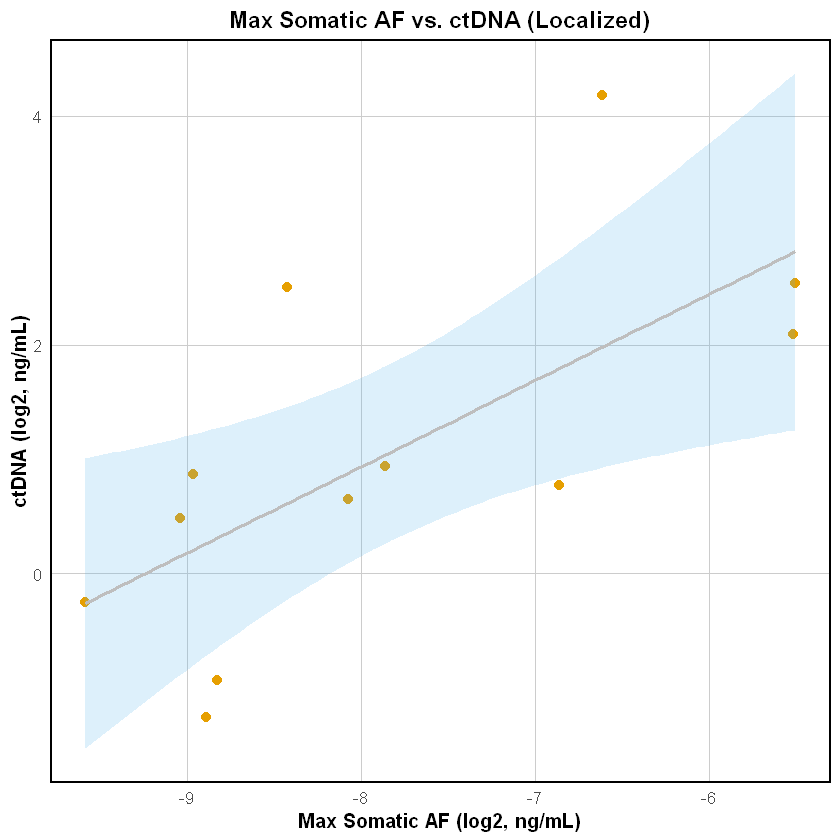

In [226]:

library(ggplot2)
library(readxl)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Transform variables to log2 if needed
df$log2_iPSA_Max Somatic AF<- log2(df$`iPSA`)
df$log2_Max_Somatic_AF <- log2(df$`Max Somatic AF`)
df$log2_Max Somatic AF<- log2(df$`Max Somatic AF`)

# Function to create scatter plot with linear regression and calculate correlation
create_scatter_plot <- function(data, x_var, y_var, x_label = NULL, y_label = NULL, title, filename, method = "pearson") {
  # Create scatter plot with linear regression and confidence bands or prediction intervals
  p <- ggplot(data, aes_string(x = x_var, y = y_var)) +
    geom_point(color = "#E69F00", size = 2.5) +  # Set point color and size
    geom_smooth(method = "lm", se = TRUE, color = "grey", fill = "#56B4E9", alpha = 0.2) +  # Add linear regression line with confidence band
    labs(x = ifelse(!is.null(x_label), x_label, gsub("_", " ", x_var)),  # Adjust x-axis label if specified
         y = ifelse(!is.null(y_label), y_label, gsub("_", " ", y_var)),  # Adjust y-axis label if specified
         title = title) +
    ggtitle(title) +
    theme_minimal() +
    theme(
      panel.grid.major = element_line(color = "grey80"),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "white"),
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  # Bold and centered title
      axis.title.x = element_text(size = 12, face = "bold"),  
      axis.title.y = element_text(size = 12, face = "bold"),  
      axis.text = element_text(size = 10),  # Adjust tick label size
      axis.line = element_line(color = "black"),  # Add axis lines
      panel.border = element_rect(color = "black", fill = NA, size = 1)  
    )
  

  print(p)
  
  in the specified directory
  ggsave(file.path("C:/Users/hayae/Desktop", filename), plot = p, width = 8, height = 6, units = "in", dpi = 300)
  
  # Calculate correlation
  if (method == "pearson") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "pearson")
    cat("Pearson correlation:", round(corr, 2), "\n")
  } else if (method == "spearman") {
    corr <- cor(data[[x_var]], data[[y_var]], method = "spearman")
    cat("Spearman correlation:", round(corr, 2), "\n")
  } else {
    stop("Invalid correlation method specified. Choose 'pearson' or 'spearman'.")
  }
}

# Filter data for metastatic and localized patients (case insensitive)
df_metastatic <- df[tolower(df$LocalizedMetastatic) == 'metastatic', ]
df_localized <- df[tolower(df$LocalizedMetastatic) == 'localized', ]

# Create and save plots for metastatic patients
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSAvs. Max Somatic AF (Metastatic)", filename = "plot_metastatic_1.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "iPSAvs. Max Somatic AF(Metastatic)", filename = "plot_metastatic_2.png", method = "pearson")
create_scatter_plot(df_metastatic, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF(Metastatic)", filename = "plot_metastatic_3.png", method = "pearson")

# Create and save plots for localized patients
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max_Somatic_AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF (log2)",
                    title = "iPSAvs. Max Somatic AF (Localized)", filename = "plot_localized_1.png", method = "pearson")
create_scatter_plot(df_localized, "log2_iPSA_Max Somatic AF", "log2_Max Somatic AF", 
                    x_label = "iPSA(%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "iPSAvs. Max Somatic AF(Localized)", filename = "plot_localized_2.png", method = "pearson")
create_scatter_plot(df_localized, "log2_Max_Somatic_AF", "log2_Max Somatic AF", 
                    x_label = "Max Somatic AF (%, log2)", y_label = "Max Somatic AF(%, log2)",
                    title = "Max Somatic AF vs. Max Somatic AF(Localized)", filename = "plot_localized_3.png", method = "pearson")


<h1><b>Pathogenicity Prediction Frequency by Genes<b></h1>

New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems
Warning message:
"Column `Gene` joining character vector and factor, coercing into character vector"Warning message:
"Column `cDNA_change` joining character vector and factor, coercing into character vector"

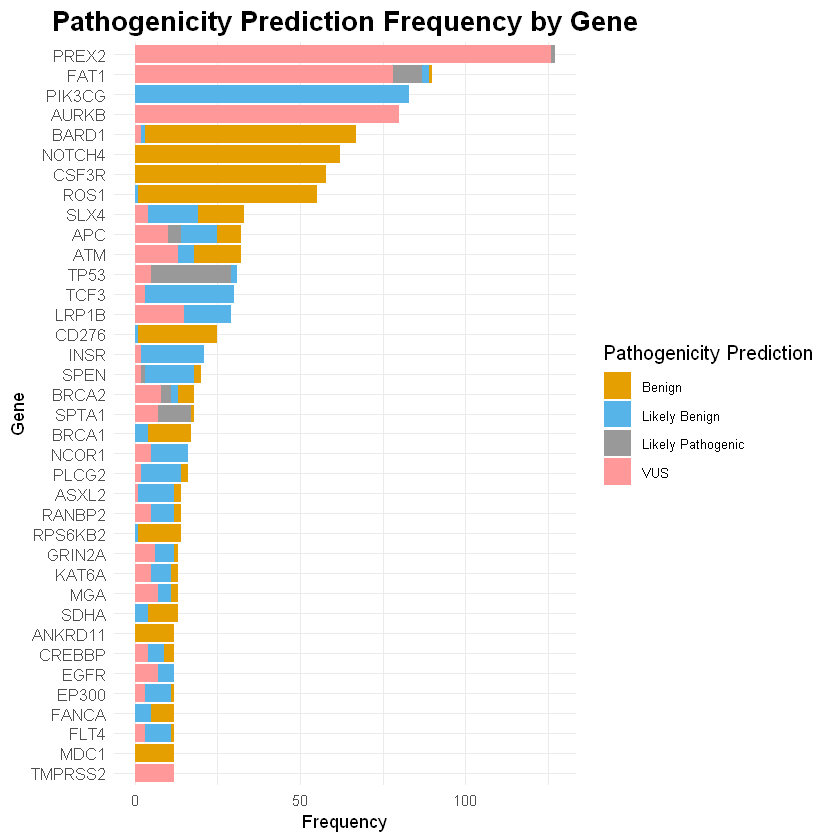

In [32]:

library(readxl)
library(ggplot2)
library(dplyr)


file_path <- "C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx"
data <- read_excel(file_path)

# Define the variants to exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Additional genes to exclude
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CBL", "SF3B1", "MYD88")

# Filter out the specified variants and genes, and additional filtering based on columns
data_filtered <- data %>%
  anti_join(variants_to_exclude, by = c("Gene", "cDNA_change")) %>%
  filter(!(Gene %in% genes_to_exclude)) %>%
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005)

# Calculate the total count of mutations per gene
gene_counts <- data_filtered %>%
  group_by(Gene) %>%
  summarise(total_count = n()) %>%
  arrange(desc(total_count))  # Arrange in descending order of total_count

# Get the top 30 genes excluding the specified genes
top_genes <- gene_counts %>%
  top_n(30, wt = total_count)

# Filter the original data to include only the top 30 genes (excluding specified genes) and remove NA values
top_genes_data <- data_filtered %>%
  filter(!is.na(Gene)) %>%
  filter(Gene %in% top_genes$Gene)

# Reorder Gene factor levels based on total_count (descending order)
top_genes_data$Gene <- factor(top_genes_data$Gene, levels = rev(top_genes$Gene))  # Reverse order


color_palette <- c("#E69F00", "#56B4E9", "#999999", "#FF9999")

# Create a horizontal bar plot with specified colors
p <- ggplot(top_genes_data, aes(x = Gene, fill = `Pathogenicity Prediction`)) +
  geom_bar(position = "stack") +
  coord_flip() +  # To make the bars horizontal
  theme_minimal() +
  labs(title = "Pathogenicity Prediction Frequency by Gene",
       x = "Gene",
       y = "Frequency",
       fill = "Pathogenicity Prediction") +
  theme(legend.title = element_text(size = 12),
        legend.text = element_text(size = 8),
        plot.title = element_text(hjust = 0.5, size= 16, face= "bold"),  
        axis.text.y = element_text(size = 10)) +   
  scale_fill_manual(values = color_palette)


print(p)


png_file <- "C:/Users/hayae/Desktop/plot.png"
ggsave(png_file, plot = p, width = 8, height = 6, dpi = 300)


In [33]:

library(readxl)
library(ggplot2)
library(dplyr)


file_path <- "C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx"
data <- read_excel(file_path)

# Identify and resolve duplicate column names
if(anyDuplicated(names(data)) > 0) {
  names(data) <- make.names(names(data), unique = TRUE)
}

# Define the variants to exclude
variants_to_exclude <- data.frame(
  gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cdna_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Additional genes to exclude
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CBL", "SF3B1", "MYD88")

# Ensure the gene and cdna_change columns are character type
data <- data %>%
  mutate(gene = as.character(gene),
         cdna_change = as.character(cdna_change))

# Filter out the specified variants and genes, and apply additional filtering based on columns
data_filtered <- data %>%
  anti_join(variants_to_exclude, by = c("gene", "cdna_change")) %>%
  filter(!(gene %in% genes_to_exclude)) %>%
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005)

# Calculate the total count of mutations per gene
gene_counts <- data_filtered %>%
  group_by(gene) %>%
  summarise(total_count = n()) %>%
  arrange(desc(total_count))  # Arrange in descending order of total_count

# Get the top 30 genes excluding the specified genes
top_genes <- gene_counts %>%
  top_n(30, wt = total_count)

# Filter the original data to include only the top 30 genes (excluding specified genes) and remove NA values
top_genes_data <- data_filtered %>%
  filter(!is.na(gene)) %>%
  filter(gene %in% top_genes$gene) %>%
  filter(clinical_significance %in% c("Pathogenic", "Likely Pathogenic", "VUS"))

# Reorder gene factor levels based on total_count (descending order)
top_genes_data$gene <- factor(top_genes_data$gene, levels = rev(top_genes$gene))  # Reverse order


color_palette <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#D55E00")

# Create a horizontal bar plot with specified colors
p <- ggplot(top_genes_data, aes(x = gene, fill = clinical_significance)) +
  geom_bar(position = "stack") +
  coord_flip() +  # To make the bars horizontal
  theme_minimal() +
  labs(title = "Clinical Significance Frequency by Gene",
       x = "Gene",
       y = "Frequency",
       fill = "Clinical Significance") +
  theme(legend.title = element_text(size = 12),
        legend.text = element_text(size = 8),
        plot.title = element_text(hjust = 0.5, size= 16, face= "bold"),  
        axis.text.y = element_text(size = 10)) +   
  scale_fill_manual(values = color_palette)


print(p)


png_file <- "C:/Users/hayae/Desktop/plot.png"
ggsave(png_file, plot = p, width = 8, height = 6, dpi = 300)


New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems


ERROR: Error: object 'gene' not found


In [31]:

library(readxl)
library(ggplot2)
library(dplyr)


file_path <- "C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx"
data <- read_excel(file_path)

# Identify and resolve duplicate column names
if(anyDuplicated(names(data)) > 0) {
  names(data) <- make.names(names(data), unique = TRUE)
}

# Define the variants to exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Additional genes to exclude
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CBL", "SF3B1", "MYD88")

# Ensure the gene and cdna_change columns are character type
data <- data %>%
  mutate(gene = as.character(gene),
         cdna_change = as.character(cdna_change))

# Filter out the specified variants and genes
data_filtered <- data %>%
  anti_join(variants_to_exclude, by = c("gene", "cdna_change")) %>%
  filter(!(gene %in% genes_to_exclude))

# Calculate the total count of mutations per gene
gene_counts <- data_filtered %>%
  group_by(gene) %>%
  summarise(total_count = n()) %>%
  arrange(desc(total_count))  # Arrange in descending order of total_count

# Get the top 30 genes excluding the specified genes
top_genes <- gene_counts %>%
  top_n(30, wt = total_count)

# Filter the original data to include only the top 30 genes (excluding specified genes) and remove NA values
top_genes_data <- data_filtered %>%
  filter(!is.na(gene)) %>%
  filter(gene %in% top_genes$gene) %>%
  filter(clinical_significance %in% c("Pathogenic", "Likely Pathogenic", "VUS"))

# Reorder gene factor levels based on total_count (descending order)
top_genes_data$gene <- factor(top_genes_data$gene, levels = rev(top_genes$gene))  # Reverse order


color_palette <- c("#E69F00", "#56B4E9", "#999999", "#FF9999", "#D55E00")

# Create a horizontal bar plot with specified colors
p <- ggplot(top_genes_data, aes(x = gene, fill = clinical_significance)) +
  geom_bar(position = "stack") +
  coord_flip() +  # To make the bars horizontal
  theme_minimal() +
  labs(title = "Clinical Significance Frequency by Gene",
       x = "Gene",
       y = "Frequency",
       fill = "Clinical Significance") +
  theme(legend.title = element_text(size = 12),
        legend.text = element_text(size = 8),
        plot.title = element_text(hjust = 0.5, size= 16, face= "bold"),  
        axis.text.y = element_text(size = 10)) +   
  scale_fill_manual(values = color_palette)


print(p)

png_file <- "C:/Users/hayae/Desktop/plot.png"
ggsave(png_file, plot = p, width = 8, height = 6, dpi = 300)


New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems


ERROR: `data` must be uniquely named but has duplicate columns

<h1><b>iPSA and PSA vs. Biomarkers<b></h1>

New names:
* `` -> ...3
Warning message:
"Removed 29 rows containing missing values (geom_point)."Warning message:
"Removed 15 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."Warning message:
"Removed 29 rows containing missing values (geom_point)."Warning message:
"Removed 15 rows containing missing values (geom_point)."

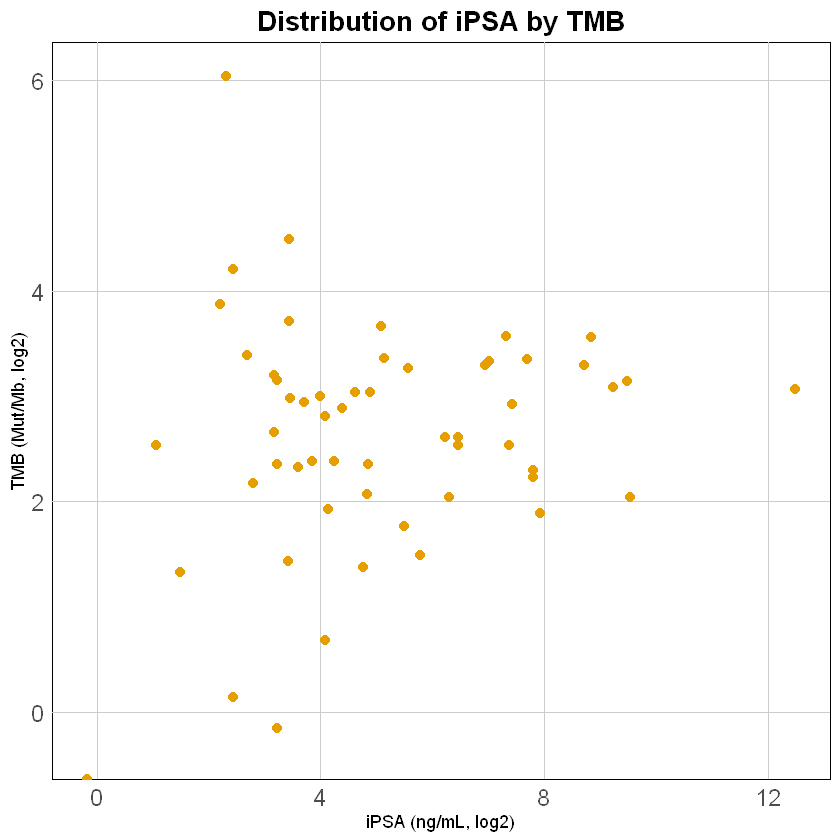

Warning message:
"Removed 14 rows containing missing values (geom_point)."

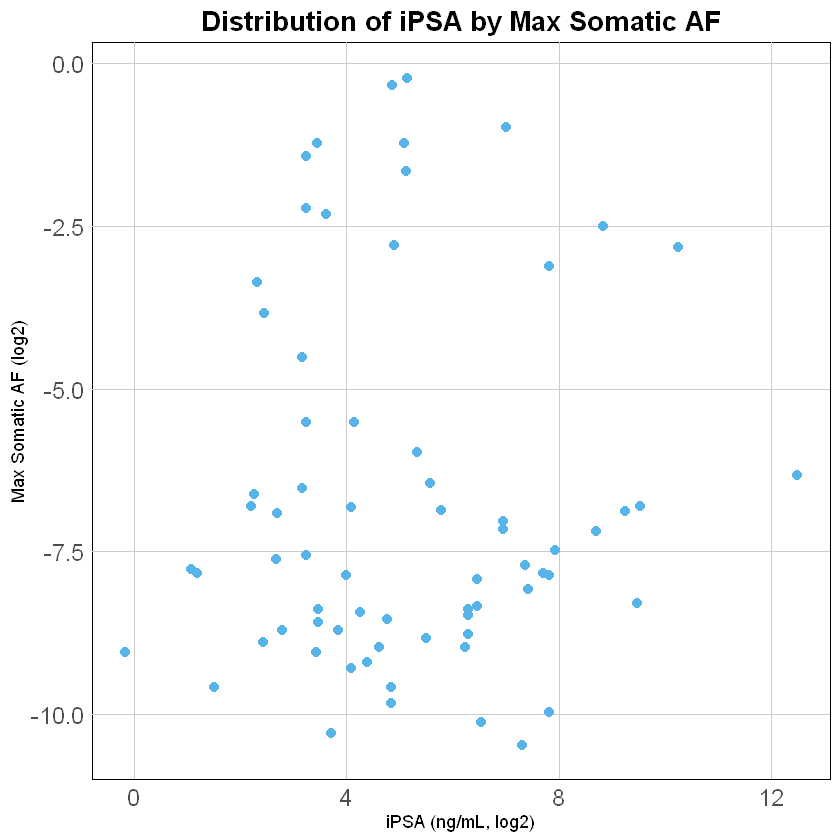

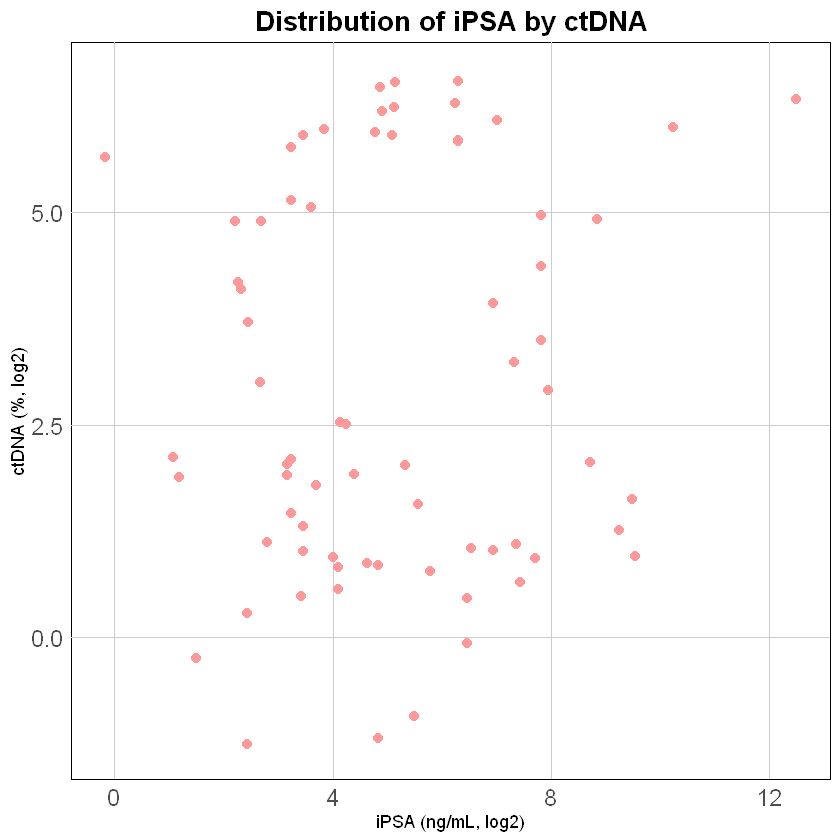

In [238]:
library(readxl)
library(ggplot2)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Transform variables to log2
df$log2_PSA_Max Somatic AF <- log2(df$`iPSA`)
df$log2_Max Somatic AF <- log2(df$Max Somatic AF)
df$log2_MS_AF <- log2(df$`Max Somatic AF`)
df$log2_Max Somatic AF <- log2(df$`Max Somatic AF`)

# Calculate Spearman correlation for each plot
spearman_corr1 <- cor(df$log2_PSA_Max Somatic AF, df$log2_Max Somatic AF, method = "spearman")
spearman_corr2 <- cor(df$log2_PSA_Max Somatic AF, df$log2_MS_AF, method = "spearman")
spearman_corr3 <- cor(df$log2_PSA_Max Somatic AF, df$log2_Max Somatic AF, method = "spearman")

# Create scatter plot for log2(iPSA) vs. log2(Max Somatic AF)
plot1 <- ggplot(df, aes(x = log2_PSA_Max Somatic AF, y = log2_Max Somatic AF)) +
  geom_point(color = "#E69F00", size = 2.5) +  # Set point color and size
  labs(x = "iPSA (ng/mL, log2)", y = "Max Somatic AF (Mut/Mb, log2)", title = paste("Spearman correlation:", round(spearman_corr1, 2))) +
  ggtitle("Distribution of iPSA by Max Somatic AF") +
  theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    axis.text = element_text(size = 14),
    plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
  )

# Save plot1 as PNG
ggsave("C:/Users/hayae/Desktop/plot1.png", plot1, width = 8, height = 6, units = "in")

# Create scatter plot for log2(iPSA) vs. log2(Max Somatic AF)
plot2 <- ggplot(df, aes(x = log2_PSA_Max Somatic AF, y = log2_MS_AF)) +
  geom_point(color = "#56B4E9", size = 2.5) +  # Set point color and size
  labs(x = "iPSA (ng/mL, log2)", y = "Max Somatic AF (log2)", title = paste("Spearman correlation:", round(spearman_corr2, 2))) +
  ggtitle("Distribution of iPSA by Max Somatic AF") +
  theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    axis.text = element_text(size = 14),
    plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
  )

# Save plot2 as PNG
ggsave("C:/Users/hayae/Desktop/plot2.png", plot2, width = 8, height = 6, units = "in")

# Create scatter plot for log2(iPSA) vs. log2(Max Somatic AF)
plot3 <- ggplot(df, aes(x = log2_PSA_Max Somatic AF, y = log2_Max Somatic AF)) +
  geom_point(color = "#FF9999", size = 2.5) +  # Set point color and size
  labs(x = "iPSA (ng/mL, log2)", y = "Max Somatic AF (%, log2)", title = paste("Spearman correlation:", round(spearman_corr3, 2))) +
  ggtitle("Distribution of iPSA by Max Somatic AF") +
  theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    axis.text = element_text(size = 14),
    plot.title = element_text(size = 16, hjust = 0.5, face = "bold")
  )

# Save plot3 as PNG
ggsave("C:/Users/hayae/Desktop/plot3.png", plot3, width = 8, height = 6, units = "in")

# Print plots (optional, if you want to see the plots in your R environment)
print(plot1)
print(plot2)
print(plot3)


<h1><b>Overall impact<b></h1>

New names:
* `` -> ...3


Plot saved successfully as plot1_output.png


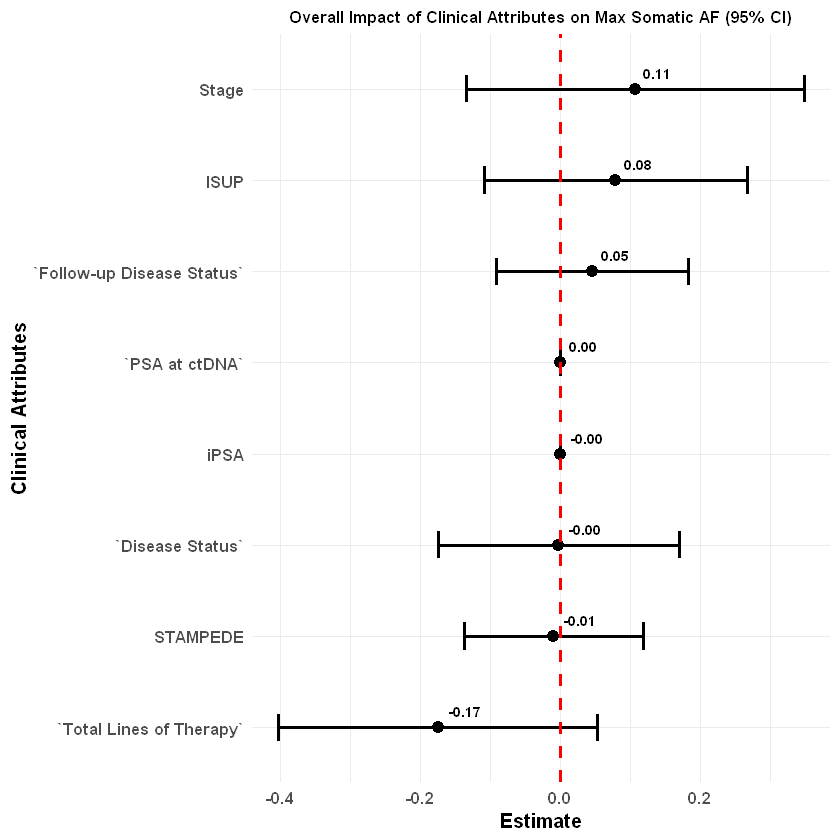

In [8]:

library(readxl)
library(ggplot2)
library(dplyr)


df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "Sheet1")

# Convert 'Stage' to character
df$Stage <- as.character(df$Stage)

# Recode 'STAMPEDE' and 'LATITUDE' to numeric values
df <- df %>%
  mutate(STAMPEDE = case_when(
    STAMPEDE == "High" ~ 2,
    STAMPEDE == "Low" ~ -2,
    TRUE ~ NA_real_
  )) 

# Recode 'Stage' to numeric values
df <- df %>%
  mutate(Stage = case_when(
    Stage == "localised PC" ~ -1,
    Stage == "mHSPC" ~ -2,
    Stage == "nmCRPC" ~ -3,
    Stage == "mCRPC" ~ -4,
    TRUE ~ NA_real_
  ))

# Recode 'Disease Status' to numeric values
df <- df %>%
  mutate(`Disease Status` = case_when(
    `Disease Status` == "CR" ~ -2,
    `Disease Status` == "PD" ~ 3,
    `Disease Status` == "PD/PR" ~ 2,
    `Disease Status` == "SD" ~ 0,
    `Disease Status` == "non-PD" ~ 1,
    TRUE ~ NA_real_
  ))

# Recode 'Follow-up Disease Status' to numeric values
df <- df %>%
  mutate(`Follow-up Disease Status` = case_when(
    `Follow-up Disease Status` == "CR" ~ -2,
    `Follow-up Disease Status` == "PD" ~ 3,
    `Follow-up Disease Status` == "PD/PR" ~ 2,
    `Follow-up Disease Status` == "SD" ~ 0,
    `Follow-up Disease Status` == "non-PD" ~ 1,
    TRUE ~ NA_real_
  ))

df <- df %>%
  mutate(`Total Lines of Therapy` = case_when(
    `Total Lines of Therapy` == "1" ~ 4,
    `Total Lines of Therapy` == "2" ~ 3,
    `Total Lines of Therapy` == "3" ~ 2,
    `Total Lines of Therapy` == "4" ~ 1,
    TRUE ~ NA_real_
  ))



# Fit linear regression model
lm_model <- lm(`Max Somatic AF` ~ iPSA + `PSA at Max Somatic AF` + ISUP  + STAMPEDE + `Total Lines of Therapy` + 
               Stage + `Disease Status` + `Follow-up Disease Status`, data = df)

# Extract coefficients and confidence intervals
coef_table <- data.frame(
  Predictor = names(coef(lm_model)),
  Estimate = coef(lm_model),
  Std_Error = summary(lm_model)$coef[, "Std. Error"]
)
coef_table$LowerCI <- coef_table$Estimate - 1.96 * coef_table$Std_Error
coef_table$UpperCI <- coef_table$Estimate + 1.96 * coef_table$Std_Error

# Filter out 'intercept'
coef_table <- coef_table[coef_table$Predictor != "(Intercept)", ]

# Define the x-coordinate for the quantitative value text
quantitative_x <- 0.0

# Plot the coefficients and confidence intervals with quantitative values
plot <- ggplot(coef_table, aes(x = Estimate, y = reorder(Predictor, Estimate))) +
  geom_point(size = 3) +  # Increase point size
  geom_errorbarh(aes(xmin = LowerCI, xmax = UpperCI), height = 0.3, size = 1.0) +  # Adjust error bar thickness and height
  geom_vline(xintercept = quantitative_x, linetype = "dashed", color = "red", size = 1) +  # Increase red line thickness
  geom_text(aes(x = Estimate, y = Predictor, label = sprintf("%.2f", Estimate)), hjust = -0.3, vjust = -1, size = 3, fontface = "bold") +  # Adjust text labels to be slightly above the estimate line
  labs(title = "Overall Impact of Clinical Attributes on Max Somatic AF (95% CI)", 
       x = "Estimate", 
       y = "Clinical Attributes") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 10),  # Center title, bold, larger size
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10)  # Increase axis tick text size
  )

 to preview it in RStudio or console
print(plot)


ggsave("C:/Users/hayae/Desktop/plot1_output.png", plot, width = 8, height = 6, dpi = 300)

# Display confirmation message
cat("Plot saved successfully as plot1_output.png\n")


<h1><b>matching of patients seq. x 2<b></h1>


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Protein_Change -> Protein_Change...12
* Score -> Score...14
* Inheritance -> Inheritance...17
* ... and 49 more problems
New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Protein_Change -> Protein_Change...12
* Score -> Score...14
* Inheritance -> Inheritance...17
* ... and 49 more problems
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C

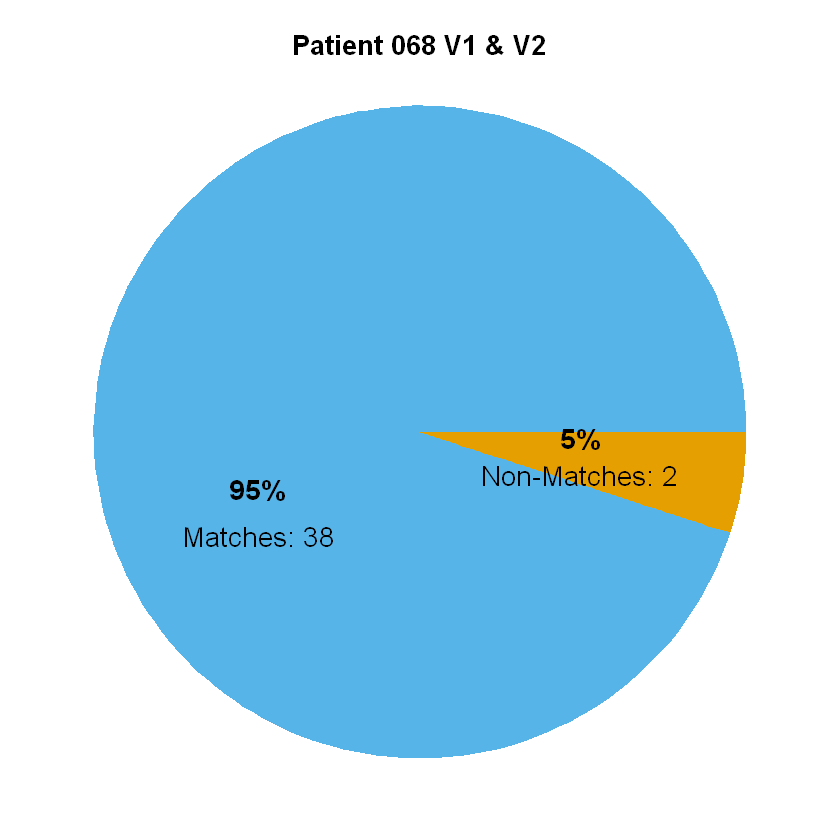

In [1]:

library(readxl)
library(dplyr)
library(ggplot2)

# Read the Datasets
excel_file_path1 <- "C:/Users/hayae/Desktop/New_opencravat_summary.xlsx"
excel_file_path2 <- "C:/Users/hayae/Desktop/New_opencravat_summary.xlsx"

# Sheet names for the two Excel files
sheet_name1 <- "PR_068"
sheet_name2 <- "PR_068_v1"

# Read data from Excel files
df1 <- read_excel(excel_file_path1, sheet = sheet_name1)
df2 <- read_excel(excel_file_path2, sheet = sheet_name2)

# Filter the desired columns
df1_filtered <- df1 %>%
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005)

df2_filtered <- df2 %>%
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005)

# Column names to match
columns_to_match_merge <- c("Chrom...1", "Gene", "Position", "Ref_Base", "Alt_Base", "Sequence_Ontology")

# Merge dataframes on the columns to find matching rows
merged_df <- inner_join(df1_filtered, df2_filtered, by = columns_to_match_merge)

# Calculate percentages and counts
total_rows_df1 <- nrow(df1_filtered)
matching_rows <- nrow(merged_df)
non_matching_rows <- total_rows_df1 - matching_rows

# Confirm that matching_rows is not greater than total_rows_df1
if (matching_rows > total_rows_df1) {
  warning("More matching rows than total rows in df1.")
  matching_rows <- total_rows_df1
}

percentage_matches <- if (total_rows_df1 > 0) (matching_rows / total_rows_df1) * 100 else 0
percentage_non_matches <- max(0, 100 - percentage_matches)  # Ensure this is non-negative

# Prepare data for plotting
labels <- c("Matches", "Non-Matches")
sizes <- c(matching_rows, non_matching_rows)
colors <- c("#56B4E9", "#E69F00")
data <- data.frame(
  labels = labels,
  sizes = sizes,
  percentages = c(percentage_matches, percentage_non_matches)
)

# Plot pie chart
ggplot(data, aes(x = "", y = sizes, fill = labels)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y", start = pi / 2) +  # Rotate the pie chart
  theme_void() +
  scale_fill_manual(values = colors) +
  theme(
    text = element_text(family = "Times New Roman", size = 14),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5, margin = margin(t = 20, b = -20))  # Center and move the title down
  ) +
  labs(title = "Patient 068 V1 & V2") +
  geom_text(aes(y = sizes / 2 + cumsum(c(0, head(sizes, -1))), 
                label = paste0(round(percentages, 1), "%")), 
            color = "Black", size = 6, fontface = "bold", vjust = 2) +
  geom_text(aes(y = sizes / 2 + cumsum(c(0, head(sizes, -1))), 
                label = paste0(labels, ": ", sizes)), 
            color = "black", size = 6, nudge_y = -0.2, vjust = 4)


ggsave("C:/Users/hayae/Desktop/matching_rows_pr_068_v1_v2_filtering.png", width = 8, height = 8, dpi = 300)


<h1><b>HRR Gene Alterations Across All Patients<b></h1>

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



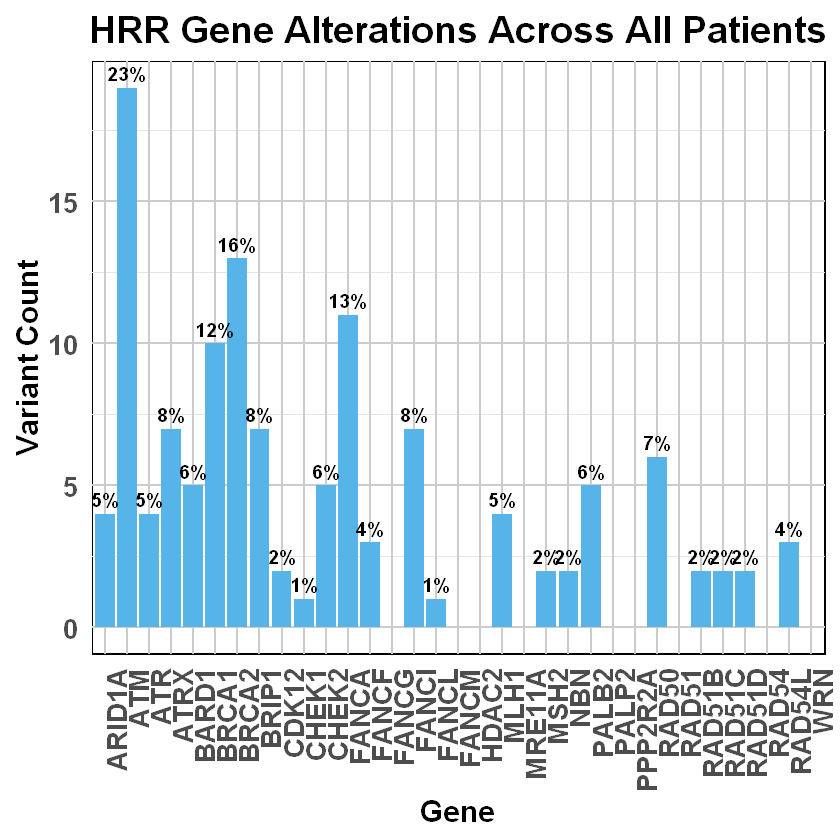

In [2]:

library(readxl)
library(ggplot2)
library(dplyr)

 into a DataFrame
df <- read_excel("C:/Users/hayae/Desktop/plot_data.xlsx", sheet = "HRR_filtered")

# Define the list of genes
genes <- c('ARID1A', 'ATM', 'ATR', 'ATRX', 'BARD1', 'BRCA1', 'BRCA2', 'BRIP1', 'CDK12', 'CHEK1',
           'CHEK2', 'FANCA', 'FANCF', 'FANCG', 'FANCI', 'FANCL', 'FANCM', 'HDAC2', 'MLH1', 'MRE11A',
           'MSH2', 'NBN', 'PALB2', 'PALP2', 'PPP2R2A', 'RAD50', 'RAD51', 'RAD51B', 'RAD51C', 'RAD51D',
           'RAD54', 'RAD54L', 'WRN')

# Count the occurrences of '1' for each gene
gene_counts <- colSums(df[genes] == 1)

# Convert to a data frame
gene_counts_df <- data.frame(Gene = names(gene_counts), Count = gene_counts)

# Define the total number of patients
total_patients <- 83

# Calculate percentages based on total_patients
gene_counts_df <- gene_counts_df %>%
  mutate(Percentage = (Count / total_patients) * 100)

# Create a bar plot with enhanced theme settings
plot <- ggplot(gene_counts_df, aes(x = Gene, y = Count)) +
  geom_bar(stat = "identity", fill = "#56B4E9") +
  geom_text(aes(label = ifelse(Percentage != 0, sprintf("%.0f%%", Percentage), "")), 
            vjust = -0.5, size = 4, fontface = "bold") +
  labs(title = "HRR Gene Alterations Across All Patients", 
       x = "Gene", 
       y = "Variant Count") +
  theme_minimal(base_size = 18) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 22),  # Center title, bold, larger size
    axis.title.x = element_text(face = "bold", size = 18),
    axis.title.y = element_text(face = "bold", size = 18),
    axis.text.x = element_text(face = "bold", size = 16, angle = 90, hjust = 1),
    axis.text.y = element_text(face = "bold", size = 16)
  )

 to preview it in RStudio or console
print(plot)

# Save the plot as PNG
ggsave("C:/Users/hayae/Desktop/HRR_gene_occurrences_with_percentage_all_patients.png", plot, width = 20, height = 10)


<h1><b>Variant Filtering<b></h1>


In [10]:
library(readxl)

# Define the Excel file path
excel_file_path <- "C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx"

# Read the specified sheet
df <- read_excel(excel_file_path, sheet = "Summary")

# Define CH genes to be filtered
ch_genes <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CDL", "SF3B1", "MYD88")

# Filter out CH genes
df_filtered <- df %>% 
  filter(!(Gene %in% ch_genes))

# Filter the dataframe based on 'Alternate_reads', 'Total_reads', and 'Variant_AF'
df_filtered <- df_filtered %>%
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005)

# Create a combined column for Gene and cDNA change
df_filtered <- df_filtered %>%
  mutate(Var1 = paste(Gene, cDNA_change, sep = "."))

# Filter to only include variants with frequency greater than 5
variant_freq_filtered <- variant_freq %>%
  filter(Freq > 5)

# Print the number of variants after filtering CH genes
cat("## Number of variants after filtering CH genes:\n")
cat(nrow(df_filtered), "\n")

# Print the recurring variants with frequency greater than 5
cat("## Recurring Variants\n")
print(variant_freq_filtered)


New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems


## Number of variants after filtering CH genes:
2302 
## Recurring Variants
# A tibble: 28 x 2
   Var1                                 Freq
   <chr>                               <int>
 1 PIK3CG.c.972 981delinsGCTGGTGGAC       83
 2 AURKB.c.885 893delinsTGTGCCCAC         80
 3 FAT1.c.9351 9363delinsCGTGAACGATAAT    67
 4 PREX2.c.1195 1200delinsAGAAAA          62
 5 BARD1.c.1518 1519delinsCA              59
 6 PREX2.c.1818 1819delinsGC              57
 7 CSF3R.c.1254 1260delinsCCCCACC         56
 8 NOTCH4.c.813 815delinsGGG              52
 9 ROS1.c.6682 6686delinsCAGTG            48
10 ATRX.c.2785G>C                         26
# ... with 18 more rows


In [11]:
# Print the entire tibble
print(variant_freq_filtered, n = nrow(variant_freq_filtered))


# A tibble: 28 x 2
   Var1                                      Freq
   <chr>                                    <int>
 1 PIK3CG.c.972 981delinsGCTGGTGGAC            83
 2 AURKB.c.885 893delinsTGTGCCCAC              80
 3 FAT1.c.9351 9363delinsCGTGAACGATAAT         67
 4 PREX2.c.1195 1200delinsAGAAAA               62
 5 BARD1.c.1518 1519delinsCA                   59
 6 PREX2.c.1818 1819delinsGC                   57
 7 CSF3R.c.1254 1260delinsCCCCACC              56
 8 NOTCH4.c.813 815delinsGGG                   52
 9 ROS1.c.6682 6686delinsCAGTG                 48
10 ATRX.c.2785G>C                              26
11 CD276.c.471 479delinsCGGGGACAT              19
12 TCF3.c.1302 1308delinsGCTGGGT               18
13 RPS6KB2.c.800 807delinsTGCCCTTT             13
14 SLX4.c.1152 1156delinsGCCCG                 13
15 SLX4.c.2854 2855delinsAT                    13
16 INSR.c.1918 1932delinsTTGAAGTGGAAACCC       10
17 ICOSLG.c.1121G>A                             8
18 SDHA.c.1367 1371delinsTGCTA 

In [19]:
# Load necessary library
library(dplyr)

# Define the CSV file path
csv_file_path <- "C:/Users/hayae/Desktop/my_opencravat_total.csv"

# Attempt to read the CSV file by guessing the correct number of columns
df <- read.csv(csv_file_path, header = TRUE, sep = ",", quote = "\"", fill = TRUE, comment.char = "", stringsAsFactors = FALSE, check.names = FALSE)

 and the first few rows to ensure it was read correctly
print(colnames(df))
print(head(df))

# Define Variants to Exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Genes to exclude based on presence
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CDL", "SF3B1", "MYD88")

# Filter out the specified variants and genes
df_filtered <- df %>%
  anti_join(variants_to_exclude, by = c("Gene", "cDNA_change")) %>%
  filter(!(Gene %in% genes_to_exclude)) %>%
  filter(Alt_reads >= 5, Tot_reads >= 500, Var_AF >= 0.005)

# Save the filtered data to a new CSV file
output_file_path <- "C:/Users/hayae/Desktop/my_opencravat_filtered.csv"
write.csv(df_filtered, output_file_path, row.names = FALSE)

# Print message indicating successful completion
cat("Filtered data saved to", output_file_path, "\n")


ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : more columns than column names


In [20]:
# Load necessary library
library(dplyr)

# Define the CSV file path
csv_file_path <- "C:/Users/hayae/Desktop/my_opencravat_total.csv"

# Attempt to read the CSV file by guessing the correct number of columns
df <- read.csv(csv_file_path, header = TRUE, sep = ",", quote = "\"", fill = TRUE, comment.char = "", stringsAsFactors = FALSE, check.names = FALSE)

 and the first few rows to ensure it was read correctly
print(colnames(df))
print(head(df))

# Define Variants to Exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Genes to exclude based on presence
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CDL", "SF3B1", "MYD88")

# Filter out the specified variants and genes
df_filtered <- df %>%
  anti_join(variants_to_exclude, by = c("Gene", "cDNA_change")) %>%
  filter(!(Gene %in% genes_to_exclude)) %>%
  filter(Alt_reads >= 5, Tot_reads >= 500, Var_AF >= 0.005)

# Save the filtered data to a new CSV file
output_file_path <- "C:/Users/hayae/Desktop/my_opencravat_filtered.csv"
write.csv(df_filtered, output_file_path, row.names = FALSE)

# Print message indicating successful completion
cat("Filtered data saved to", output_file_path, "\n")


ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : more columns than column names


<h1><b>Clinical Significance Frequency by Gene</b></h1>


New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems
Warning message:
"Column `Gene` joining character vector and factor, coercing into character vector"Warning message:
"Column `cDNA_change` joining character vector and factor, coercing into character vector"

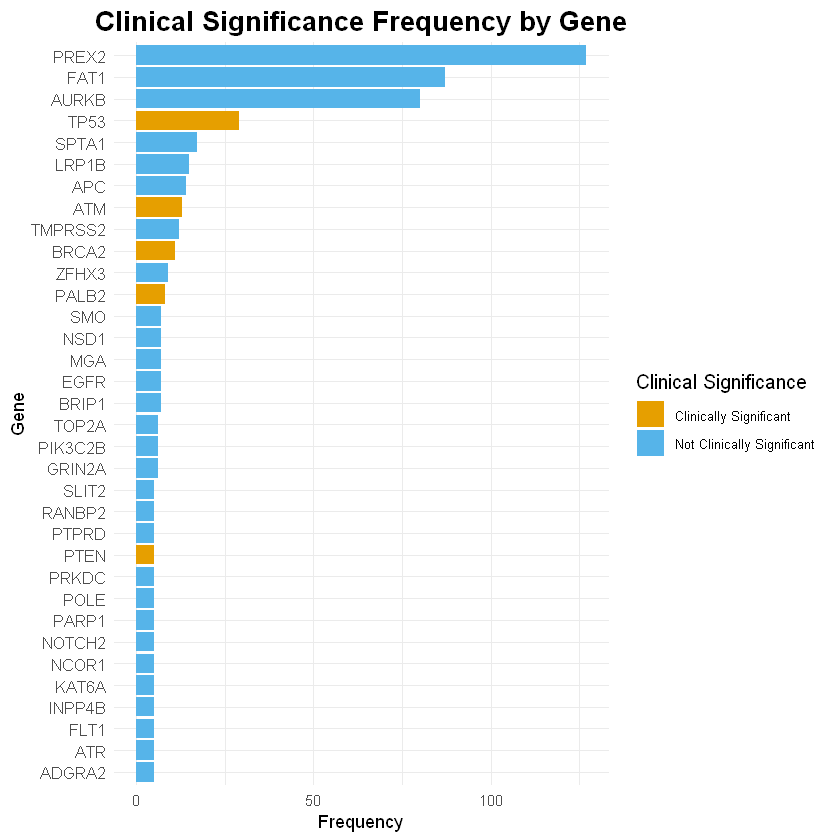

In [46]:

library(readxl)
library(ggplot2)
library(dplyr)


file_path <- "C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx"
data <- read_excel(file_path)



# Rename columns to ensure they are unique and properly referenced
data <- data %>%
  rename(
    Gene = `Gene`,
    cDNA_change = `cDNA_change`,
    Alternate_reads = `Alternate_reads`,
    Total_reads = `Total_reads`,
    Variant_AF = `Variant_AF`,
    Pathogenicity_Prediction = `Pathogenicity Prediction`,
    Clinical_Significance = `Clinical Significance`
  )

# Define the genes to exclude completely (CH genes)
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CBL", "SF3B1", "MYD88")

# Define the variants to exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Ensure the Gene and cDNA_change columns are character type
data <- data %>%
  mutate(Gene = as.character(Gene),
         cDNA_change = as.character(cDNA_change))

# Filter out the specified variants and genes
data_filtered <- data %>%
  filter(!(Gene %in% genes_to_exclude)) %>%  # Exclude CH genes
  anti_join(variants_to_exclude, by = c("Gene", "cDNA_change")) %>%  # Exclude specific variants
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005) %>%  # Additional filtering
  filter(Pathogenicity_Prediction %in% c("Pathogenic", "Likely Pathogenic", "VUS"))  # Pathogenicity filtering

# Count the occurrence of Clinical Significance for each gene
gene_counts <- data_filtered %>%
  group_by(Gene, Clinical_Significance) %>%
  summarise(count = n()) %>%
  arrange(count)  # Arrange in ascending order of count

# Get the top 30 most frequent genes
top_genes <- gene_counts %>%
  group_by(Gene) %>%
  summarise(total_count = sum(count)) %>%
  top_n(30, wt = total_count) %>%
  arrange(total_count)  # Arrange in ascending order of total_count

# Filter the gene_counts to include only the top 30 genes
gene_counts_top30 <- gene_counts %>%
  filter(Gene %in% top_genes$Gene)

# Reorder the Gene factor levels based on total_count (ascending order)
gene_counts_top30$Gene <- factor(gene_counts_top30$Gene, levels = top_genes$Gene)

# Create a bar plot for Clinical Significance by Gene
p <- ggplot(gene_counts_top30, aes(x = Gene, y = count, fill = Clinical_Significance)) +
  geom_bar(stat = "identity", position = "stack") +
  coord_flip() +  # To make the bars horizontal
  theme_minimal() +
  labs(title = "Clinical Significance Frequency by Gene",
       x = "Gene",
       y = "Frequency",
       fill = "Clinical Significance") +
  theme(legend.title = element_text(size = 12),
        legend.text = element_text(size = 8),
        plot.title = element_text(hjust = 0.5, size= 16, face= "bold"),  
        axis.text.y = element_text(size = 10)) +   
  scale_fill_manual(values = c("#E69F00", "#56B4E9"))


print(p)


png_file <- "C:/Users/hayae/Desktop/plot.png"
ggsave(png_file, plot = p, width = 8, height = 6, dpi = 300)


<h1><b>Roche Diagnostics Validation Plot</b></h1>


New names:
* `` -> ...6
New names:
* Chrom -> Chrom...1
* Transcript -> Transcript...8
* Score -> Score...14
* Inheritance -> Inheritance...17
* Link -> Link...20
* ... and 46 more problems
Warning message:
"Column `Gene` joining character vector and factor, coercing into character vector"Warning message:
"Column `cDNA_change` joining character vector and factor, coercing into character vector"

# A tibble: 66 x 2
   Samples     n
   <chr>   <int>
 1 122         5
 2 126        22
 3 127         5
 4 128         1
 5 133         3
 6 135        38
 7 138        14
 8 142         4
 9 175         5
10 200        11
# ... with 56 more rows


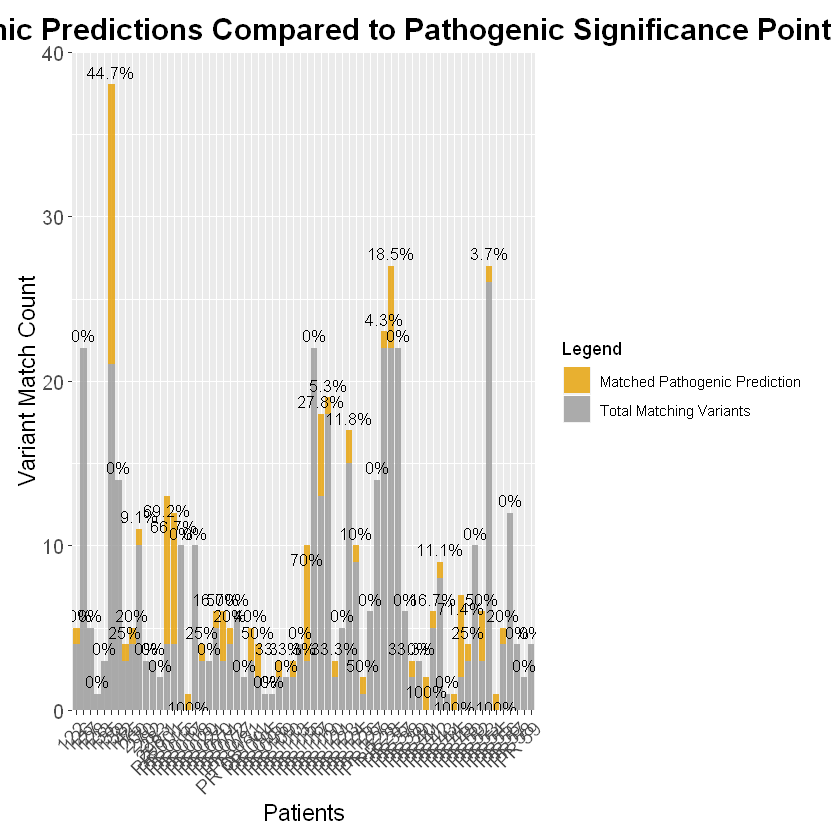

In [65]:

library(readxl)
library(dplyr)
library(ggplot2)

# Load the data from the Excel files
roche_df <- read_excel('C:/Users/hayae/Desktop/plot_data.xlsx', sheet = 'ROCHE')
summary_df <- read_excel('C:/Users/hayae/Desktop/New_opencravat_summary_onepage.xlsx', sheet = 'Summary')

# Exclude 'Sera 1' and 'Sera 05'
roche_df <- roche_df %>% filter(!Samples %in% c('Sera 1', 'Sera 05'))
summary_df <- summary_df %>% filter(!Samples %in% c('Sera 1', 'Sera 05'))

# Merge the dataframes on 'Samples' and 'Gene' columns
merged_df <- merge(roche_df, summary_df, by = c('Samples', 'Gene'))

# Remove rows with NA in the Samples column
merged_df <- merged_df %>% filter(!is.na(Samples))

# Define the genes to exclude completely (CH genes)
genes_to_exclude <- c("ASXL1", "DNMT3A", "IDH2", "GNB1", "TET2", "GNAS", "SRSF2", "JAK2", "PPM1D", "CBL", "SF3B1", "MYD88")

# Define the variants to exclude
variants_to_exclude <- data.frame(
  Gene = c("PIK3CG", "AURKB", "FAT1", "PREX2", "BARD1", "PREX2", "CSF3R", "NOTCH4", "ROS1", "ATRX", 
           "CD276", "TCF3", "RPS6KB2", "SLX4", "SLX4", "INSR", "ICOSLG", "SDHA", "SDHA", "TMPRSS2", 
           "BRCA1", "MET", "PRKDC", "TET1", "FANCA", "INSR", "MCL1", "TCF3"),
  cDNA_change = c("c.972_981delinsGCTGGTGGAC", "c.885_893delinsTGTGCCCAC", "c.9351_9363delinsCGTGAACGATAAT", 
                  "c.1195_1200delinsAGAAAA", "c.1518_1519delinsCA", "c.1818_1819delinsGC", "c.1254_1260delinsCCCCACC", 
                  "c.813_815delinsGGG", "c.6682_6686delinsCAGTG", "c.2785G>C", "c.471_479delinsCGGGGACAT", 
                  "c.1302_1308delinsGCTGGGT", "c.800_807delinsTGCCCTTT", "c.1152_1156delinsGCCCG", "c.2854_2855delinsAT", 
                  "c.1918_1932delinsTTGAAGTGGAAACCC", "c.1121G>A", "c.1367_1371delinsTGCTA", "c.1396G>A", 
                  "c.768_777delinsCGTGGGCGGT", "c.2077_2082delinsAACAGT", "c.3029C>T", "c.9601C>T", "c.3053_3055delinsGTG", 
                  "c.2574C>G", "c.1638_1650delinsTGGGCAGGATGCA", "c.680C>T", "c.1291_1308delinsAGTCCCATGTCGCTGGGT")
)

# Ensure the Gene and cDNA_change columns are character type
merged_df <- merged_df %>%
  mutate(Gene = as.character(Gene),
         cDNA_change = as.character(cDNA_change))

# Filter out the specified variants and genes
filtered_df <- merged_df %>%
  filter(!(Gene %in% genes_to_exclude)) %>%  # Exclude CH genes
  anti_join(variants_to_exclude, by = c("Gene", "cDNA_change")) %>%  # Exclude specific variants
  filter(Alternate_reads >= 5, Total_reads >= 500, Variant_AF >= 0.005) %>%  # Additional filtering
  filter(`Pathogenicity Prediction` %in% c("Pathogenic", "Likely Pathogenic", "VUS"))  # Pathogenicity filtering

# Debugging: Check the filtered data
#print(head(filtered_df))

# Count total matches per sample
total_matches <- merged_df %>% count(Samples)
print(total_matches) # Debugging: Check total matches

# Count pathogenic matches per sample
pathogenic_matches <- filtered_df %>% count(Samples)
#print(pathogenic_matches) # Debugging: Check pathogenic matches

# Merge total matches and pathogenic matches
matches <- merge(total_matches, pathogenic_matches, by = 'Samples', all.x = TRUE)
matches <- matches %>% rename(Total = n.x, Pathogenic = n.y)
matches$Pathogenic[is.na(matches$Pathogenic)] <- 0
matches <- matches %>% mutate(Percentage = (Pathogenic / Total) * 100)

# Debugging: Check the merged matches data
#print(matches)

# Reshape the data for plotting
matches_long <- data.frame(
  Samples = rep(matches$Samples, 2),
  Count = c(matches$Total - matches$Pathogenic, matches$Pathogenic),
  Type = rep(c("Total Matching Variants", "Matched Pathogenic Prediction"), each = nrow(matches))
)

# Debugging: Check the reshaped data
#print(matches_long)

# Plot the results as a bar plot with percentage of pathogenic predictions
ggplot(matches_long, aes(x = Samples, y = Count, fill = Type)) +
  geom_bar(stat = "identity", position = "stack", alpha = 0.8) +
  geom_text(data = matches, aes(x = Samples, y = Total, label = paste0(round(Percentage, 1), "%")), 
            vjust = ifelse(matches$Percentage > 50, 1.5, -0.5), color = "black", size = 3.5, inherit.aes = FALSE) +
  scale_fill_manual(values = c("Total Matching Variants" = "#999999", "Matched Pathogenic Prediction" = "#E69F00")) +
  labs(title = 'Roche Variant Pathogenic Predictions Compared to Pathogenic Significance Point System',
       x = 'Patients',
       y = 'Variant Match Count',
       fill = "Legend") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title.x = element_text(size = 14), 
        axis.title.y = element_text(size = 14),
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18), 
        plot.margin = margin(t = 10, r = 10, b = 10, l = 10)) + 
  scale_y_continuous(expand = c(0, 0), limits = c(0, 40)) 

# Save the plot to a file with increased width and height
ggsave('C:/Users/hayae/Desktop/match_counts_percentage_bar_plot.png', width = 30, height = 15)
